**Reference**: https://github.com/qiskit-community/ibm-quantum-challenge-2024/tree/main/content/lab_4

In [4]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are on 3.10 > python < 3.12
%pip install -q qiskit[visualization]==1.0.2
%pip install -q qiskit-ibm-runtime
%pip install -q qiskit-aer
%pip install -q graphviz
%pip install -q qiskit-serverless -U
%pip install -q qiskit-transpiler-service -U
%pip install -q git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 34.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━

In [5]:
# Import all in one cell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import InstructionProperties
from qiskit.visualization import plot_distribution
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.primitives import StatevectorEstimator

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
    EstimatorV2 as Estimator,
    SamplerV2 as Sampler,
    EstimatorOptions
)

In [6]:
%set_env QXToken=16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b

env: QXToken=16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b


In [7]:
# qc-grader should be 0.18.12 (or higher)
import qc_grader

qc_grader.__version__

'0.18.12'

In [8]:
from qc_grader.challenges.iqc_2024 import (
    grade_lab4_ex1,
    grade_lab4_ex2,
    grade_lab4_ex3,
    grade_lab4_ex4,
    grade_lab4_ex5,
    grade_lab4_ex6,
    grade_lab4_ex7
)

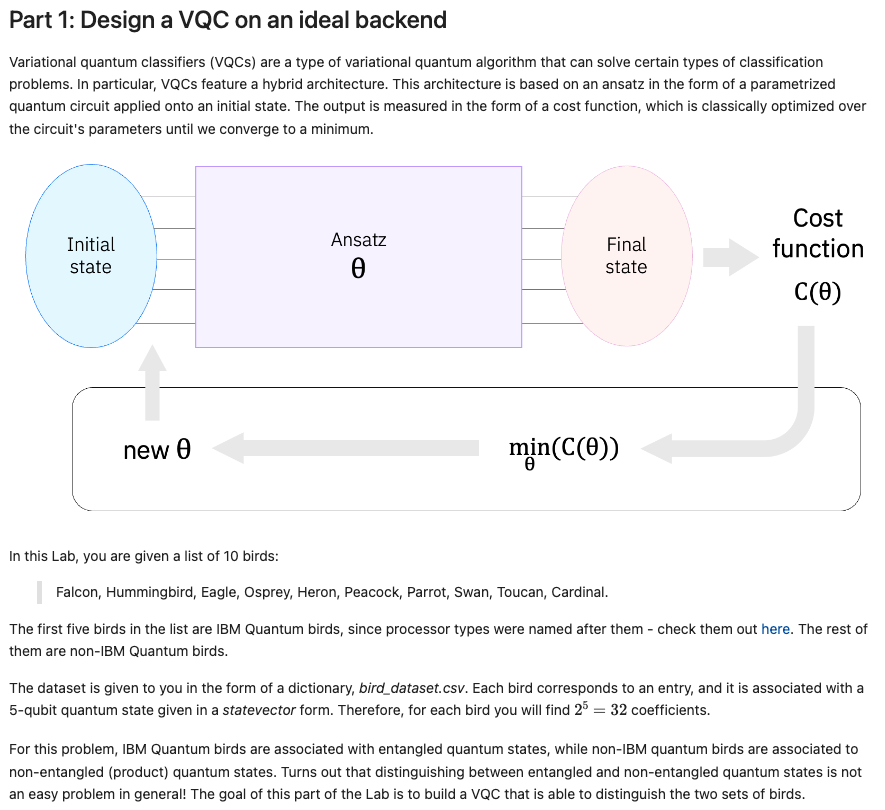

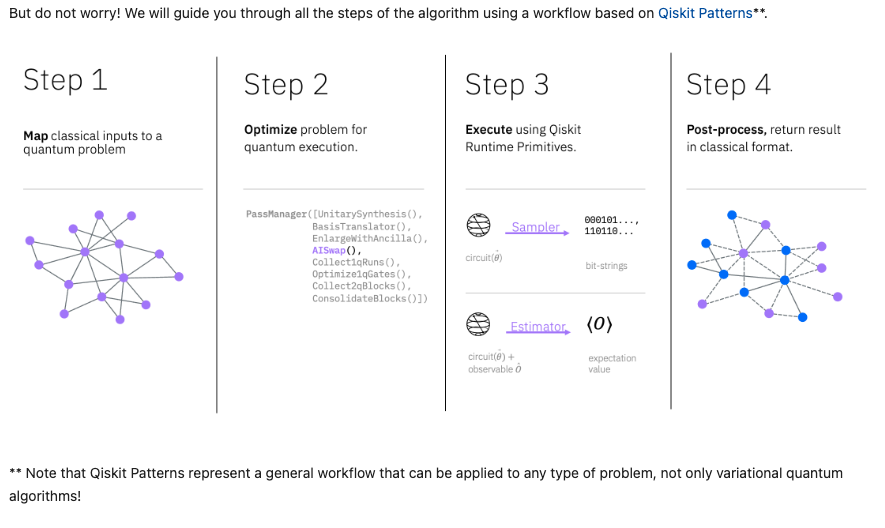

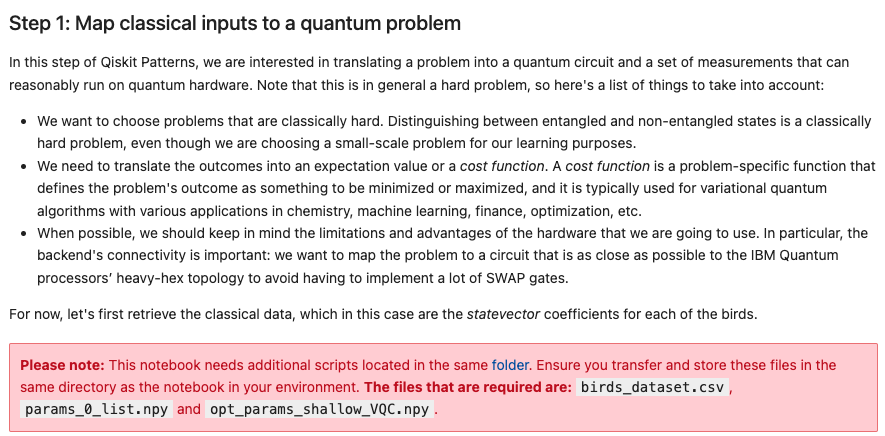

In [13]:
# Define num_qubits, the number of qubits, for the rest of the Lab
num_qubits = 5

# Load the dictionary
birds_dataset = pd.read_csv('birds_dataset.csv')

# Check if the dataset is loaded correctly - coefficients should be complex numbers
for i in range(2**num_qubits):
    key = 'c%.0f' %i
    birds_dataset[key] = birds_dataset[key].astype(np.complex128)

# Print the dataset
birds_dataset

names                  c0                  c1                  c2  \
0       Falcon  0.707107+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
1  Hummingbird  0.000000+0.000000j  0.707107+0.000000j  0.000000+0.000000j   
2        Eagle  0.000000+0.000000j  0.000000+0.000000j  0.707107+0.000000j   
3       Osprey  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
4        Heron  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
5      Peacock  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
6       Parrot  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
7         Swan  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
8       Toucan  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
9     Cardinal  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   

                   c3                  c4        c5        c6        c7  \
0  0.000000+0.000000j  0.000000+0.000000j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1  0.000000+0.000000j  0.000000+0.000000j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2  0.000000+0.000000j  0.000000+0.000000j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3  0.707107+0.000000j  0.000000+0.000000j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4  0.000000+0.000000j  0.707107+0.000000j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
5  0.000000+0.000000j  0.000000+0.000000j  1.0+0.0j  0.0+0.0j  0.0+0.0j   
6  0.000000+0.000000j  0.000000+0.000000j  0.0+0.0j  1.0+0.0j  0.0+0.0j   
7  0.000000+0.000000j  0.000000+0.000000j  0.0+0.0j  0.0+0.0j  1.0+0.0j   
8  0.000000+0.000000j  0.000000+0.000000j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
9  0.000000+0.000000j  0.000000+0.000000j  0.0+0.0j  0.0+0.0j  0.0+0.0j   

         c8  ...       c22       c23       c24       c25       c26  \
0  0.0+0.0j  ...  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1  0.0+0.0j  ...  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2  0.0+0.0j  ...  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3  0.0+0.0j  ...  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4  0.0+0.0j  ...  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
5  0.0+0.0j  ...  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
6  0.0+0.0j  ...  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
7  0.0+0.0j  ...  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
8  1.0+0.0j  ...  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
9  0.0+0.0j  ...  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   

                  c27                 c28                 c29  \
0  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
1  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
2  0.000000+0.000000j  0.000000+0.000000j  0.707107+0.000000j   
3  0.000000+0.000000j  0.707107+0.000000j  0.000000+0.000000j   
4  0.707107+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
5  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
6  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
7  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
8  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
9  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   

                  c30                 c31  
0  0.000000+0.000000j  0.707107+0.000000j  
1  0.707107+0.000000j  0.000000+0.000000j  
2  0.000000+0.000000j  0.000000+0.000000j  
3  0.000000+0.000000j  0.000000+0.000000j  
4  0.000000+0.000000j  0.000000+0.000000j  
5  0.000000+0.000000j  0.000000+0.000000j  
6  0.000000+0.000000j  0.000000+0.000000j  
7  0.000000+0.000000j  0.000000+0.000000j  
8  0.000000+0.000000j  0.000000+0.000000j  
9  0.000000+0.000000j  0.000000+0.000000j  

[10 rows x 33 columns]

## Exercise 1:

Retrieve the coefficients of each of the quantum states from the dictionary. Save them in a list of lists containing complex numbers: [[], [], [], ...]. Create a corresponding list of labels with label 1 for IBM Quantum birds and label 0 for non-IBM Quantum birds: [int, int, ...].

In [10]:
import pandas as pd
import numpy as np
list_labels=[]
# Load the dataset
birds_dataset = pd.read_csv('birds_dataset.csv')

# List of bird names
bird_names = ["Falcon", "Hummingbird", "Eagle", "Osprey", "Heron"]
birds_name = birds_dataset['names']
print(birds_name)
for i in range(len(birds_name)):
    print(birds_name[i])
    if birds_name[i] in bird_names:
        list_labels.append(1)
    else:
        list_labels.append(0)
print(list_labels)

0         Falcon
1    Hummingbird
2          Eagle
3         Osprey
4          Heron
5        Peacock
6         Parrot
7           Swan
8         Toucan
9       Cardinal
Name: names, dtype: object
Falcon
Hummingbird
Eagle
Osprey
Heron
Peacock
Parrot
Swan
Toucan
Cardinal
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [11]:
# Drop the 'name' column
birds_dataset_without_name = birds_dataset.drop(columns=['names'])
list_coefficients=[]
for index, row in birds_dataset_without_name.iterrows():
    # Extract coefficients from the row and convert them to complex numbers
    # bird_coefficients = [complex(row[f'c{i}']) for i in range(2**num_qubits)]
    bird_coefficients = [complex(row[key]) for key in row.keys()]
    # print(bird_coefficients)
    # Add coefficients to the list of lists
    list_coefficients.append(bird_coefficients)

print(list_coefficients)

[[(0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j)], [0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j], [0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j], [0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j], [0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j], [0j, 0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j], [0j, 

In [12]:
# Submit your answer using following code
print(list_coefficients)
print(list_labels)

[[(0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j)], [0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j], [0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j], [0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j], [0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j], [0j, 0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j], [0j, 

In [110]:
# Submit your answer using following code
grade_lab4_ex1(list_coefficients, [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


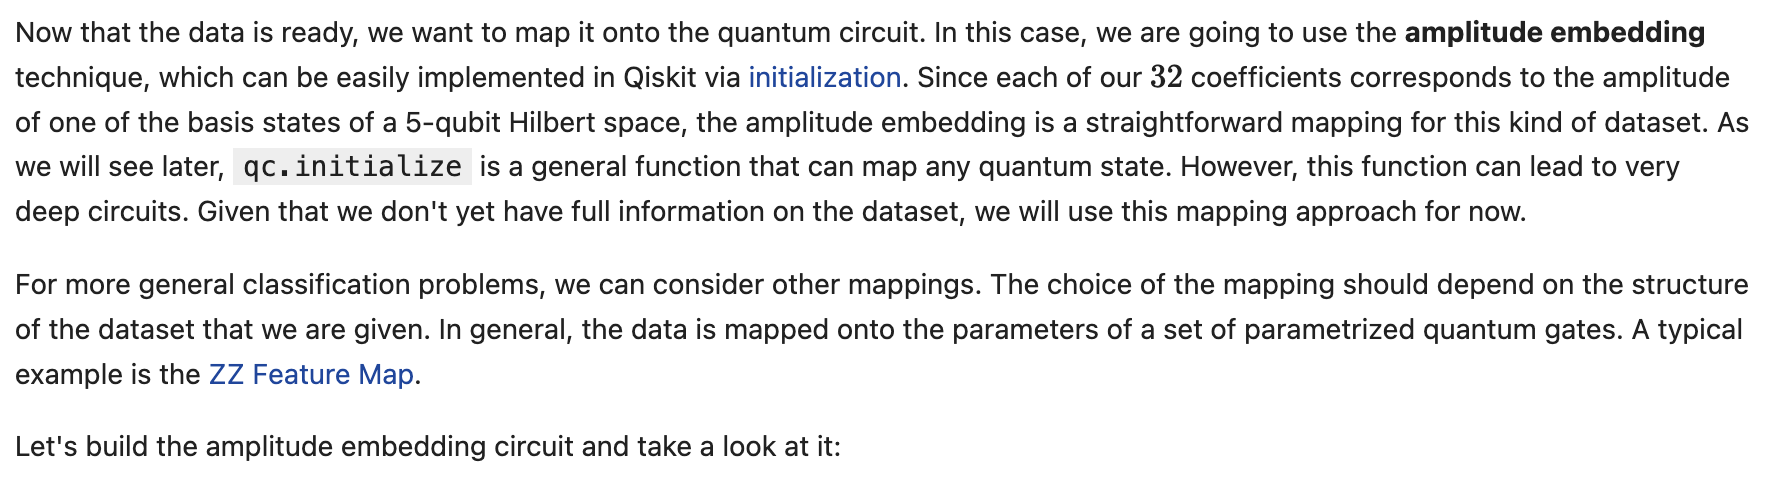

In [13]:
index_bird = 2 # You can check different birds by changing the index
amplitudes = list_coefficients[index_bird]

# Build the amplitude embedding
qc = QuantumCircuit(5)
qc.initialize(amplitudes, range(num_qubits))
qc.measure_all()

# Draw the amplitude embedding circuit
qc.draw(output="mpl")

NameError: name 'num_qubits' is not defined

If we decompose the circuit before drawing it, we can better see its structure. As mentioned above, the qc.initialize()function leads to a very deep circuit. In fact, the problem of state preparation, which aims at mapping an arbitrary quantum state onto a quantum circuit efficiently, is still an open research problem

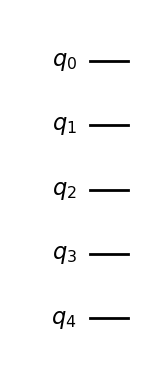

In [14]:
# Draw the decomposition of the amplitude embedding circuit
qc.decompose(reps=8).draw(output="mpl", fold=40)

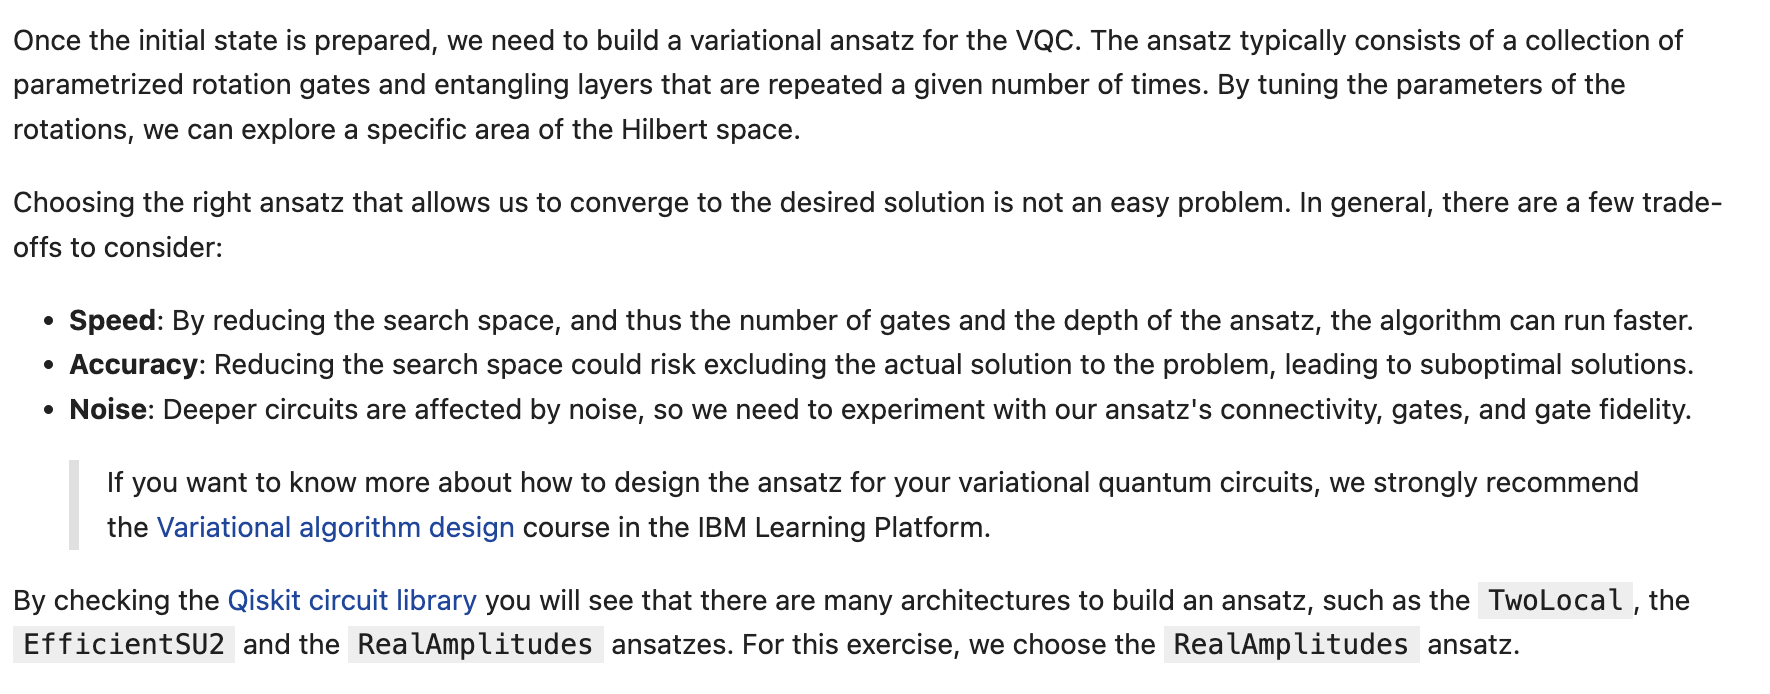

### **Exercise 2:**

Build the ansatz using the RealAmplitudes circuit from the Qiskit circuit library. The ansatz should look as follows: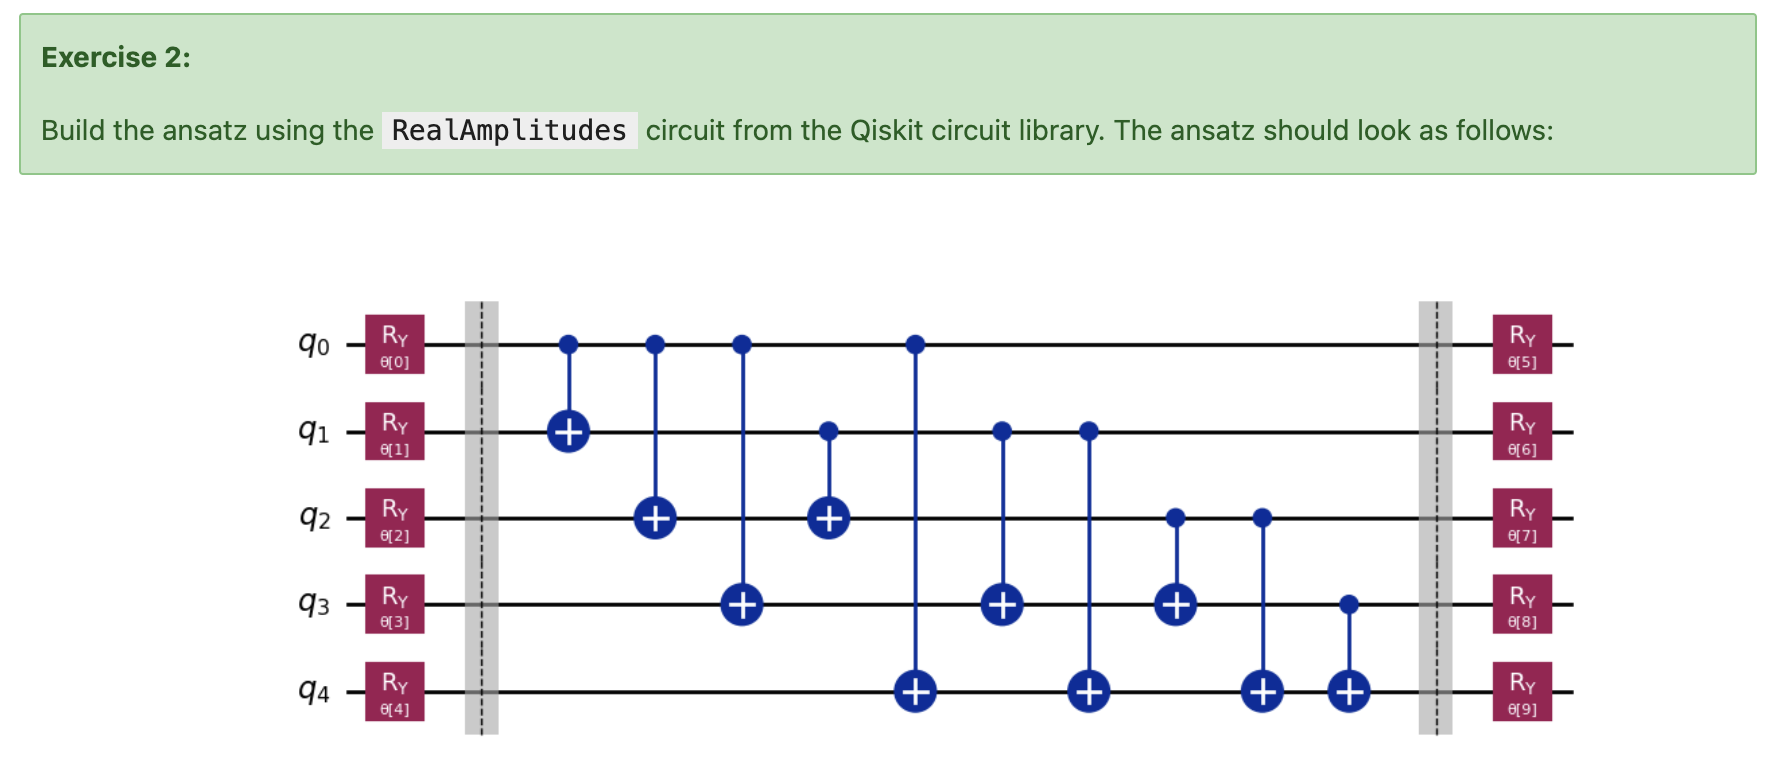

In [15]:
from qiskit.circuit.library import EfficientSU2
num_qubits = 5
reps = 1
entanglement = 'full'
ansatz = RealAmplitudes(num_qubits, reps=reps, entanglement=entanglement)

# Draw the ansatz circuit
print(ansatz.draw())

     ┌────────────────────────────────────────────────────────────────────┐
q_0: ┤0                                                                   ├
     │                                                                    │
q_1: ┤1                                                                   ├
     │                                                                    │
q_2: ┤2 RealAmplitudes(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9]) ├
     │                                                                    │
q_3: ┤3                                                                   ├
     │                                                                    │
q_4: ┤4                                                                   ├
     └────────────────────────────────────────────────────────────────────┘


In [121]:
# Submit your answer using following code
grade_lab4_ex2(num_qubits, reps, entanglement)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


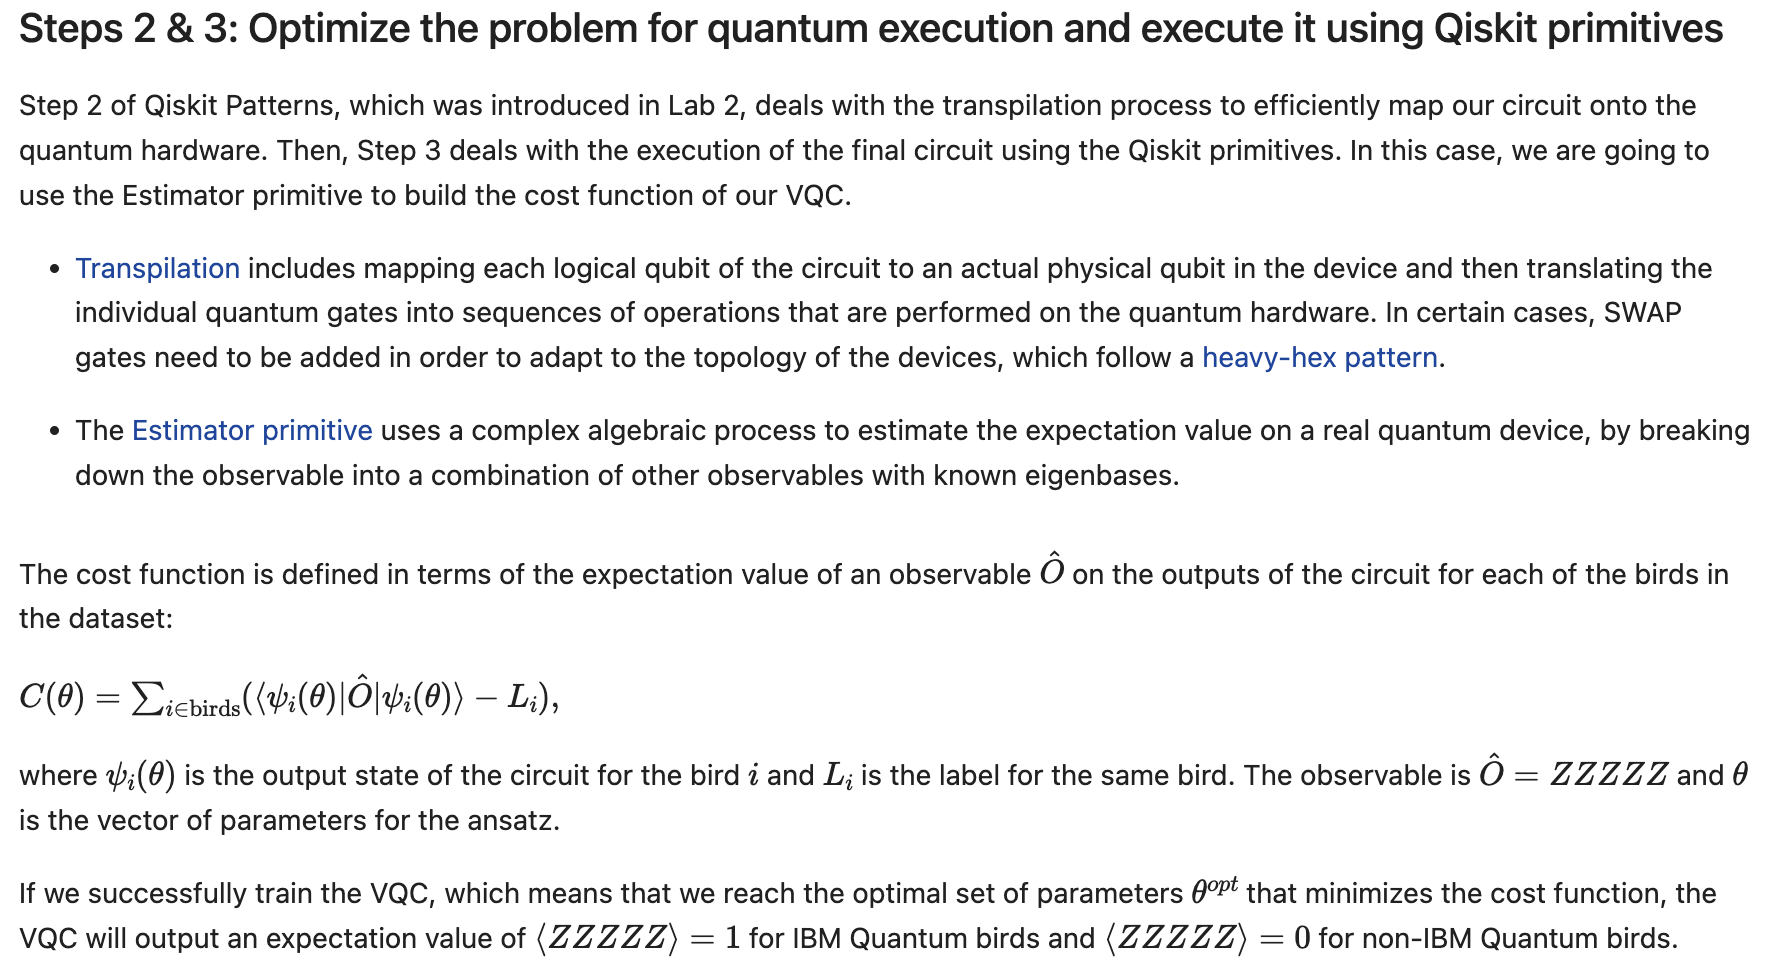

In [16]:
# Define the observable
obs = SparsePauliOp("ZZZZZ")

In [17]:
# Define the estimator and pass manager
estimator = StatevectorEstimator() #To train we use StatevectorEstimator to get the exact simulation
pm = generate_preset_pass_manager(backend=AerSimulator(), optimization_level=3, seed_transpiler=0)

In [18]:
# Define the cost function
def cost_func(params, list_coefficients, list_labels, ansatz, obs, estimator, pm, callback_dict):

    """Return cost function for optimization

    Parameters:
        params (ndarray): Array of ansatz parameters
        list_coefficients (list): List of arrays of complex coefficients
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        estimator (EstimatorV2): Statevector estimator primitive instance
        pm (PassManager): Pass manager
        callback_dict (dict): Dictionary to store callback information

    Returns:
        float: Cost function estimate
    """

    cost = 0
    for amplitudes,label in zip(list_coefficients, list_labels):
        qc = QuantumCircuit(num_qubits)
        # Amplitude embedding
        qc.initialize(amplitudes)
        # Compose initial state + ansatz
        classifier = qc.compose(ansatz)
        # Transpile classifier
        transpiled_classifier = pm.run(classifier)
        # Transpile observable
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        # Run estimator
        pub = (transpiled_classifier, transpiled_obs, params)
        job = estimator.run([pub])
        # Get result
        result = job.result()[0].data.evs
        # Compute cost function (cumulative)
        cost += np.abs(result - label)

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = params
    callback_dict["cost_history"].append(cost)

    # Print the iterations to screen on a single line
    print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], cost),
        end="\r",
        flush=True,
    )

    return cost

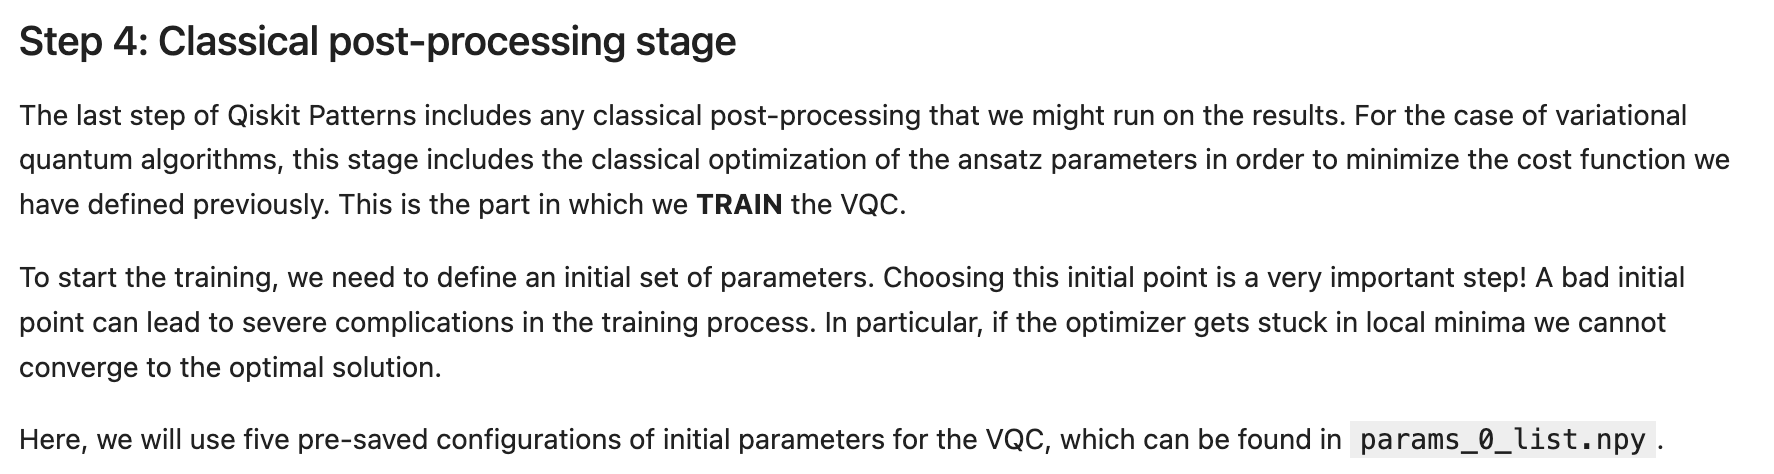

In [126]:
# Intialize the lists to store the results from different runs
cost_history_list = []
res_list = []

# Retrieve the initial parameters
params_0_list = np.load("params_0_list.npy")

for it, params_0 in enumerate(params_0_list):

    print('Iteration number: ', it)

    # Initialize a callback dictionary
    callback_dict = {
        "prev_vector": None,
        "iters": 0,
        "cost_history": [],
    }

    # Minimize the cost function using scipy
    res = minimize(
        cost_func,
        params_0,
        args=(list_coefficients, list_labels, ansatz, obs, estimator, pm, callback_dict),
        method="cobyla", # Classical optimizer
        options={'maxiter': 200}) # Maximum number of iterations

    # Print the results after convergence
    print(res)

    # Save the results from different runs
    res_list.append(res)
    cost_history_list.append(callback_dict["cost_history"])

Iteration number:  0
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 4.000011467451044
       x: [ 3.517e+00 -8.492e-04  5.588e-04  3.655e+00  4.717e+00
            1.571e+00  1.804e-03  6.281e+00  2.629e+00  3.145e+00]
    nfev: 200
   maxcv: 0.0
Iteration number:  1
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 2.9486038843201667e-08
       x: [-1.309e-07 -1.571e+00  1.571e+00 -1.104e+00  1.934e+00
            1.571e+00  1.571e+00 -2.869e-05  1.571e+00 -2.305e-05]
    nfev: 200
   maxcv: 0.0
Iteration number:  2
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 4.113279744917959
       x: [ 4.050e+00  3.146e+00  3.213e+00  3.439e+00  1.043e+00
            2.321e+00  3.105e+00  3.063e+00  3.192e+00  2.586e+00]
    nfev: 145
   maxcv: 0.0
Iteration number:  3
 message: Maximum number of function evaluations has been exceeded.
 success:

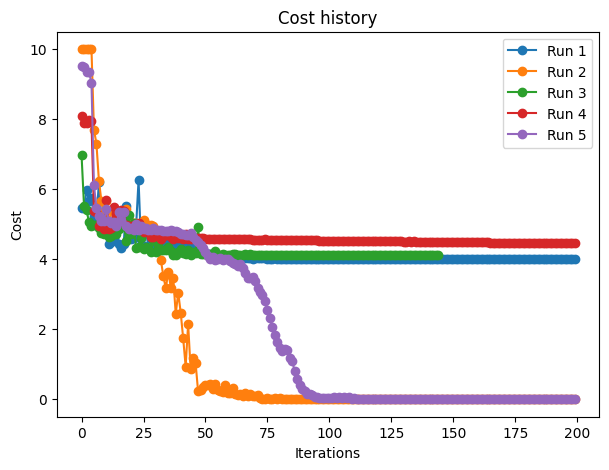

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost history')
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')

for i, cost_history in enumerate(cost_history_list):
    ax.plot(range(len(cost_history)), cost_history, marker='o', linestyle='-', label=f'Run {i+1}')

# Add a legend
ax.legend()

# Display the plot
plt.show()

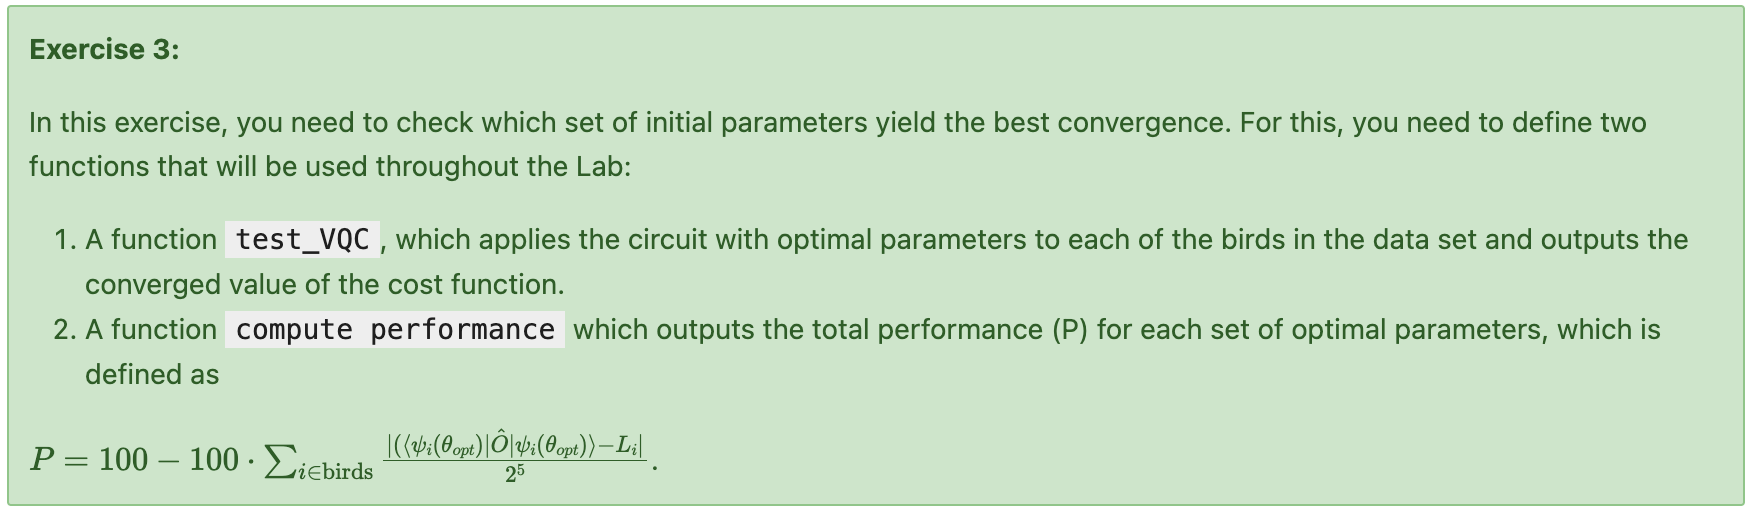

In [147]:
import numpy as np
from qiskit import QuantumCircuit
# Retrieve the initial parameters
params_0_list = np.load("params_0_list.npy")

for it, params_0 in enumerate(params_0_list):

    print('Iteration number: ', it)

    # Initialize a callback dictionary
    callback_dict = {
        "prev_vector": None,
        "iters": 0,
        "cost_history": [],
    }
def test_VQC(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm):
    """Return the performance of the classifier

    Parameters:
        list_coefficients (list): List of arrays of complex coefficients
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        estimator (EstimatorV2): Statevector estimator
        pm (PassManager): Pass manager for transpilation

    Returns:
        list: List of test results
    """
    cost = 0
    for amplitudes,label in zip(list_coefficients, list_labels):
        qc = QuantumCircuit(num_qubits)
        # Amplitude embedding
        qc.initialize(amplitudes)
        # Compose initial state + ansatz
        classifier = qc.compose(ansatz)
        # Transpile classifier
        transpiled_classifier = pm.run(classifier)
        # Transpile observable
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        # Run estimator
        pub = (transpiled_classifier, transpiled_obs, params_0)
        job = estimator.run([pub])
        # Get result
        result = job.result()[0].data.evs
        # Compute cost function (cumulative)
        cost += np.abs(result - label)

    return cost

def compute_performance(result_list, list_labels):
    """Return the performance of the classifier

    Parameters:
        result_list (list): List of results
        list_labels (list): List of labels

    Returns:
        float: Performance of the classifier
    """
    if isinstance(result_list, float):
        result_list = [result_list]  # Convert single result to list

    # Calculate the mean absolute error (MAE)
    absolute_errors = [np.abs(result - label) for result, label in zip(result_list, list_labels)]
    performance = np.mean(absolute_errors)

    return performance
    # return performance


Iteration number:  0
Iteration number:  1
Iteration number:  2
Iteration number:  3
Iteration number:  4


[[(0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j)], [0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j], [0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j], [0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j], [0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j], [0j, 0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j], [0j, 

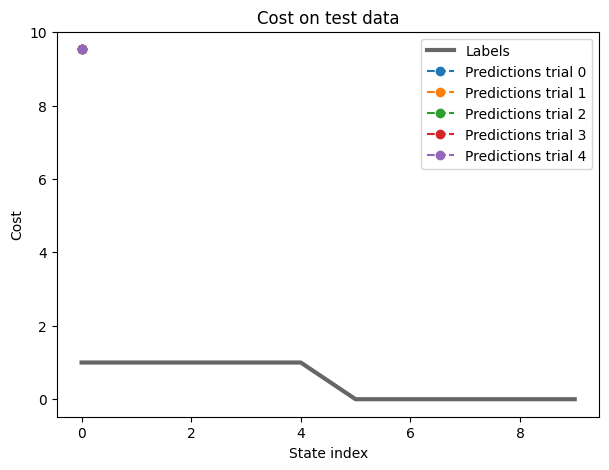

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')

ax.plot(list_labels, 'k-', linewidth=3, alpha=0.6, label='Labels')

for index in range(len(res_list)):
    opt_params = res_list[index].x
    print(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm)
    results_test = test_VQC(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm)
    print(results_test)
    print(f"Performance for trial {index}: {compute_performance(results_test, list_labels)}")
    ax.plot(results_test, 'o--', label='Predictions trial '+str(index))

ax.legend()

In [153]:
# Submit your answer using following code
best_result_index = 1
grade_lab4_ex3(res_list[best_result_index]) # Expected result type: OptimizeResult

Submitting your answer. Please wait...
Performance: 100.00% > 90%
Congratulations! 🎉 Your answer is correct.


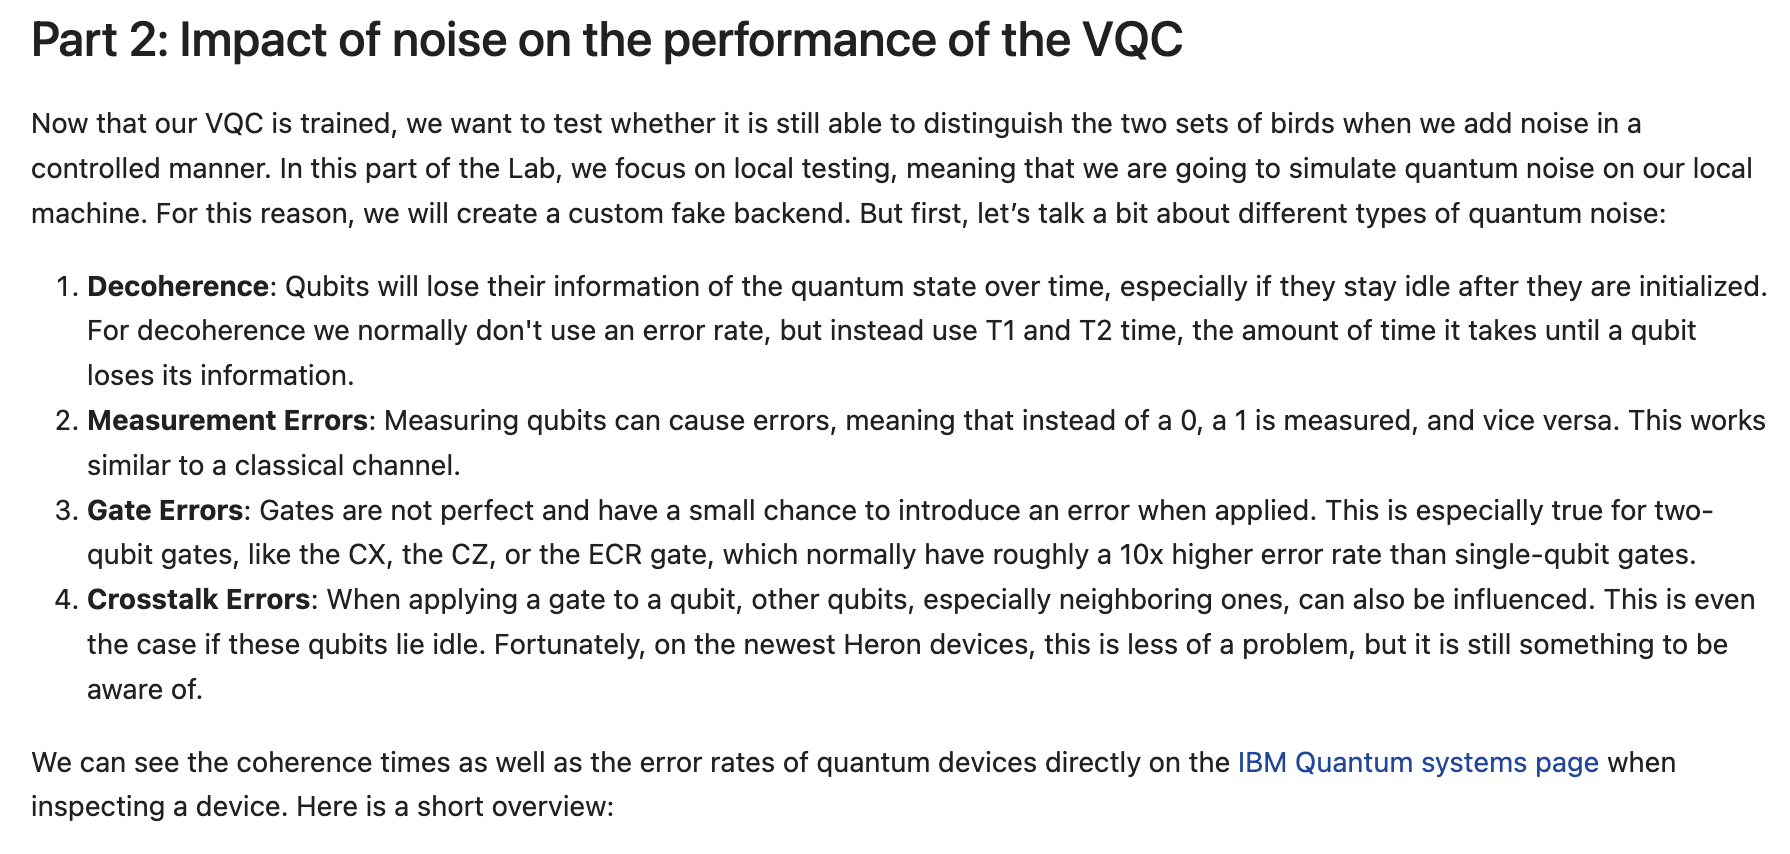

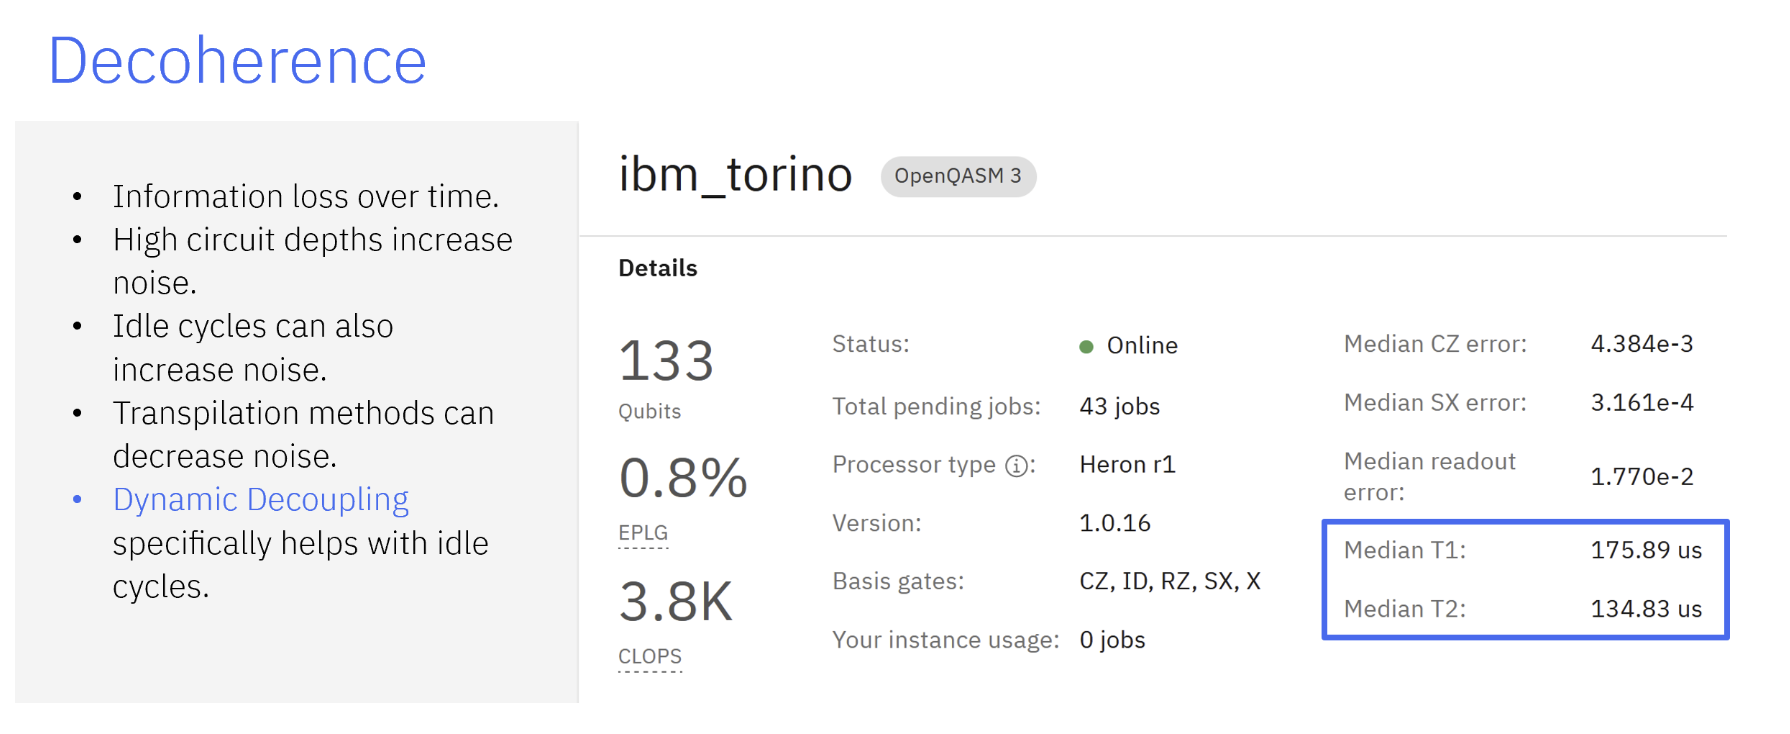

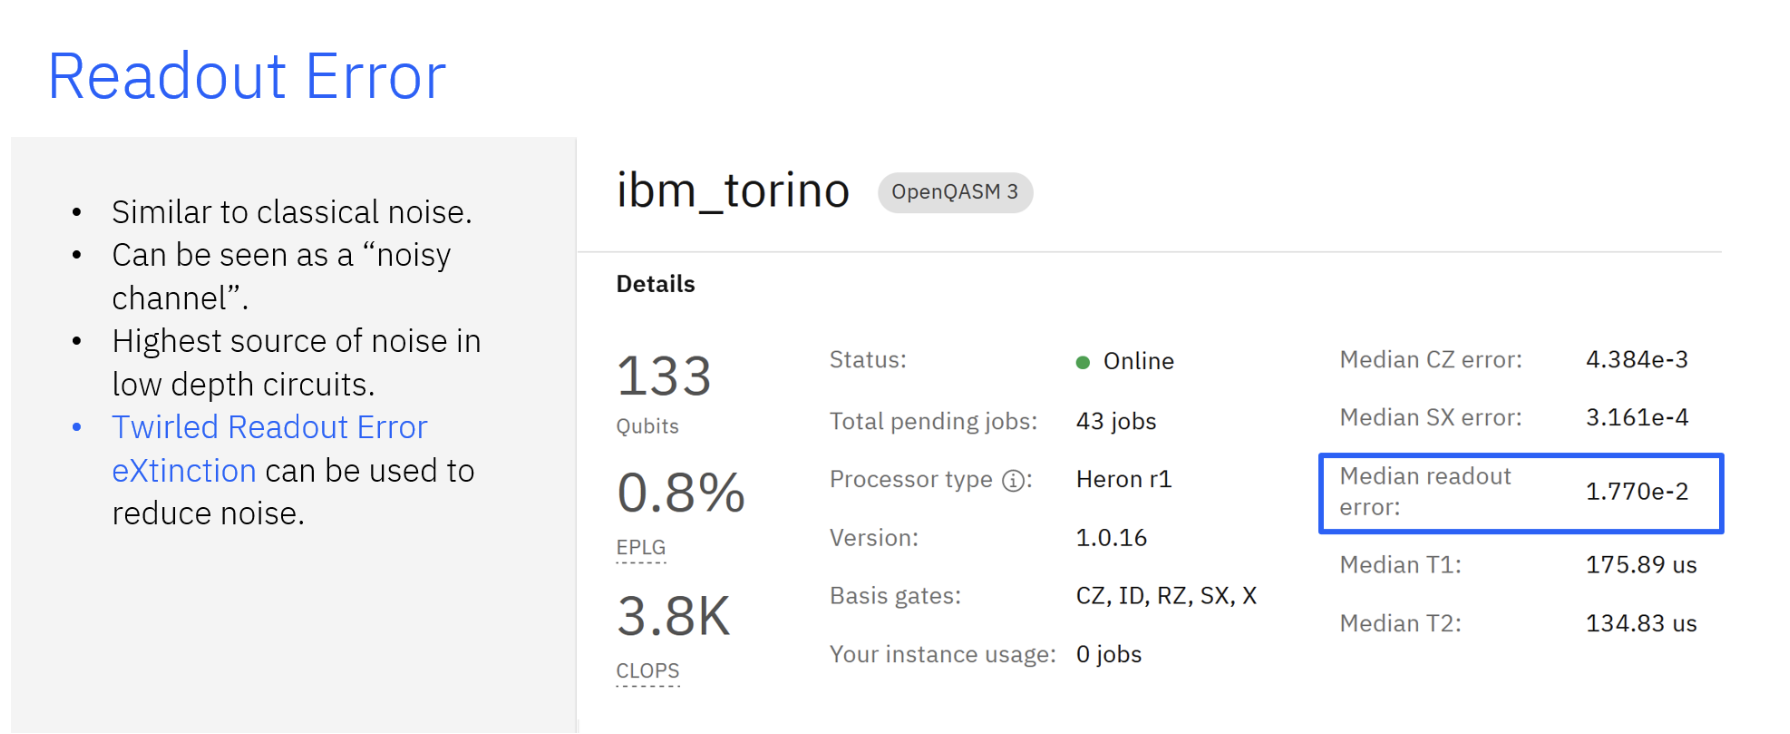

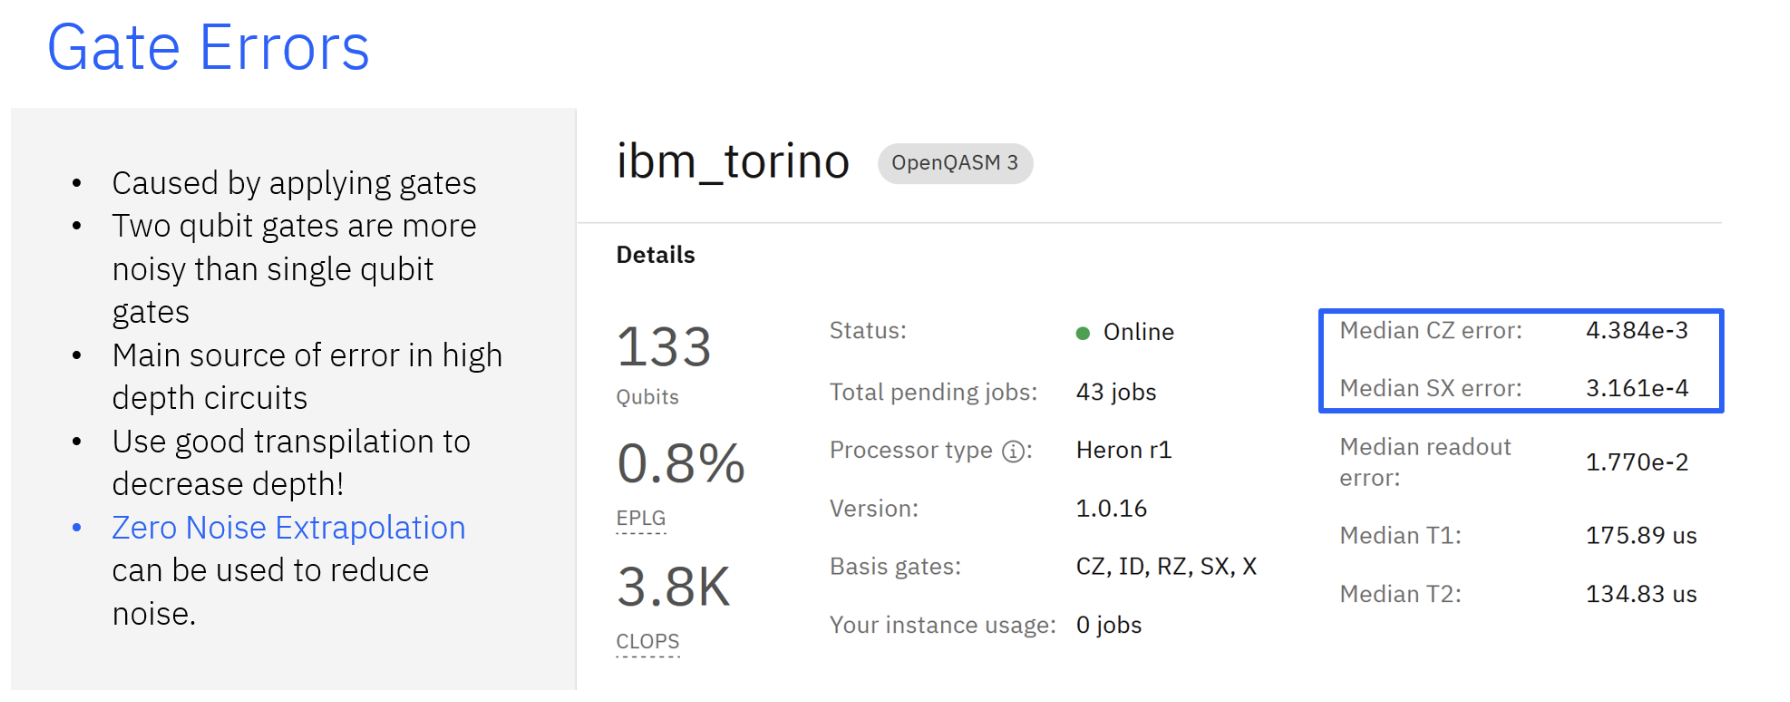

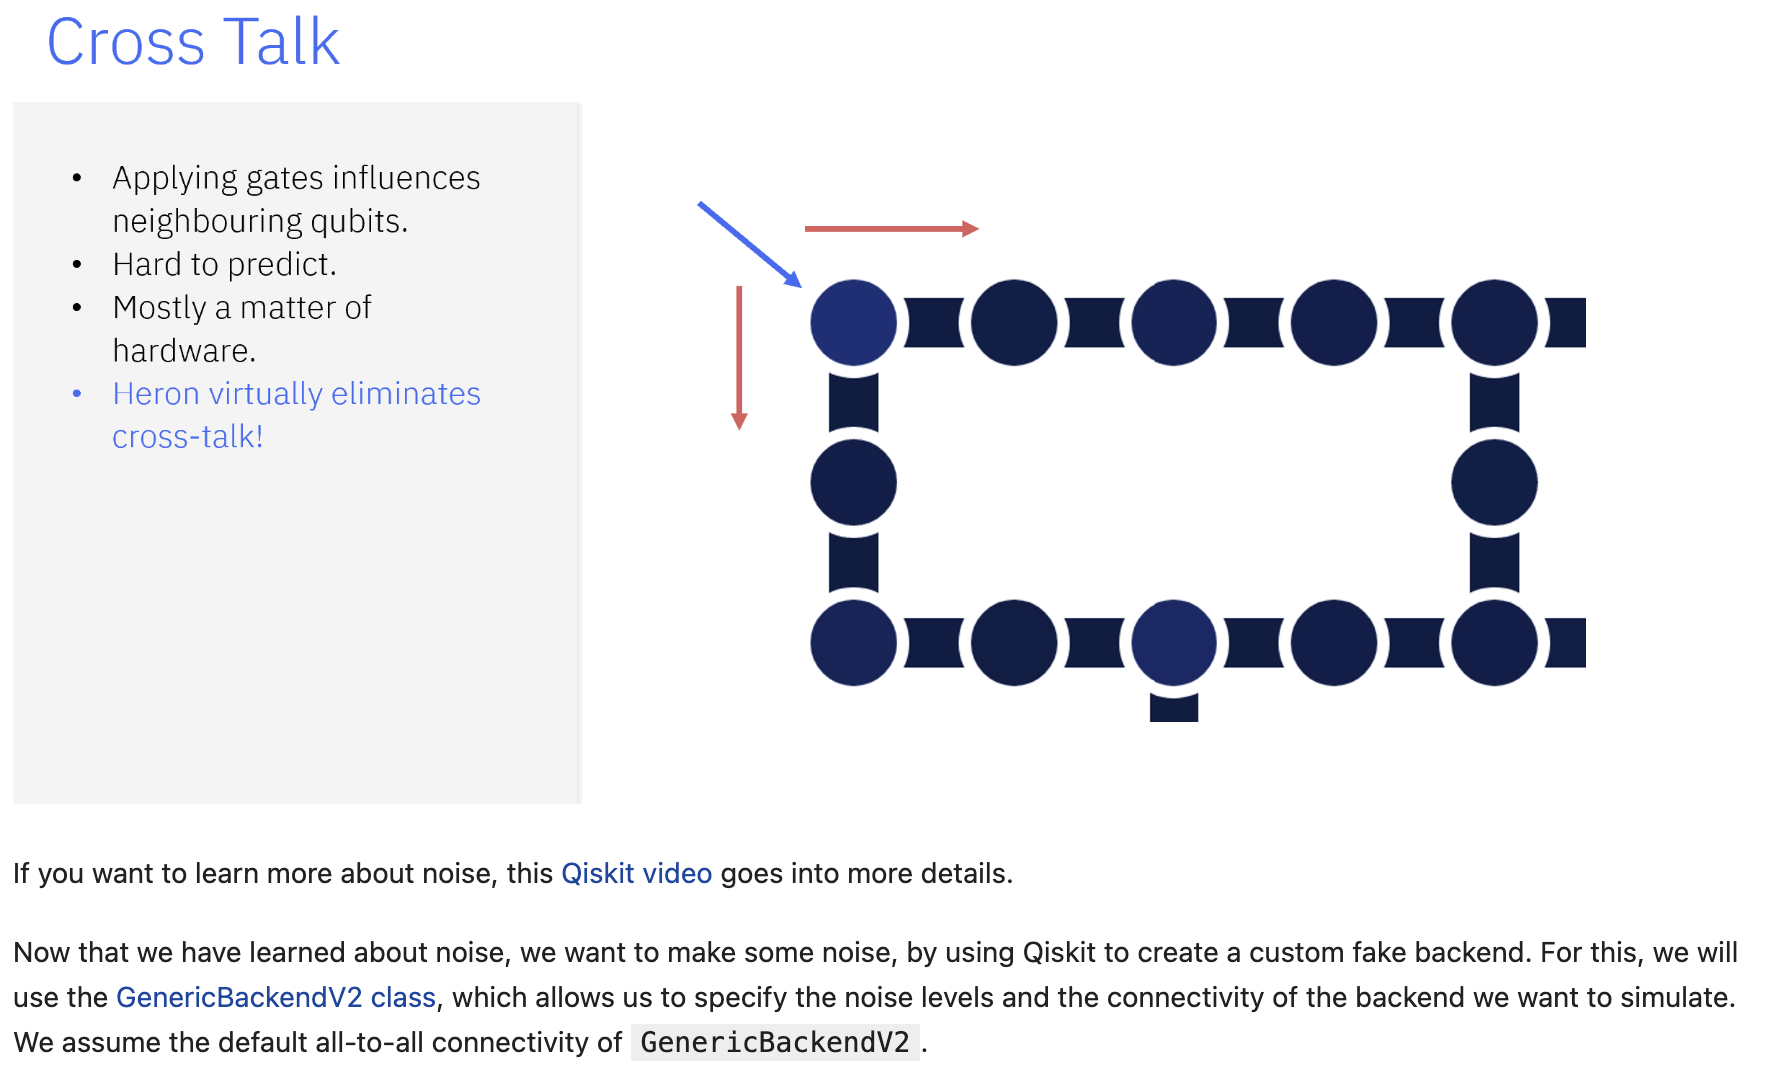

In [19]:
fake_backend = GenericBackendV2(
    num_qubits=5,
    basis_gates=["id", "rz", "sx", "x", "cx"]
  )

Using the Generic Backend as it is not that useful, since in the end we usually want to create a fake backend that behaves as similarly as possible to a specific backend on which we want to run our quantum circuit on. In this part of the Lab, we will show you how to change the properties of the generic fake backend we have just created in a controlled manner, and thus adapt it to our needs. For this we will now create a helper function, update_error_rate:

In [20]:
def update_error_rate(backend, error_rates):

    """Updates the error rates of the backend

    Parameters:
        backend (BackendV2): Backend to update
        error_rates (dict): Dictionary of error rates

    Returns:
        None
    """

    default_duration=1e-8
    if "default_duration" in error_rates:
        default_duration = error_rates["default_duration"]

    # Update the 1-qubit gate properties
    for i in range(backend.num_qubits):
        qarg = (i,)
        if "rz_error" in error_rates:
            backend.target.update_instruction_properties('rz', qarg, InstructionProperties(error=error_rates["rz_error"], duration=default_duration))
        if "x_error" in error_rates:
            backend.target.update_instruction_properties('x', qarg, InstructionProperties(error=error_rates["x_error"], duration=default_duration))
        if "sx_error" in error_rates:
            backend.target.update_instruction_properties('sx', qarg, InstructionProperties(error=error_rates["sx_error"], duration=default_duration))
        if "measure_error" in error_rates:
            backend.target.update_instruction_properties('measure', qarg, InstructionProperties(error=error_rates["measure_error"], duration=default_duration))

    # Update the 2-qubit gate properties (CX gate) for all edges in the chosen coupling map
    if "cx_error" in error_rates:
        for edge in backend.coupling_map:
            backend.target.update_instruction_properties('cx', tuple(edge), InstructionProperties(error=error_rates["cx_error"], duration=default_duration))

In [21]:
error_rates = {
  "default_duration": 1e-8,
  "rz_error": 1e-8,
  "x_error": 1e-8,
  "sx_error": 1e-8,
  "measure_error": 1e-8,
  "cx_error": 1e-8
}

update_error_rate(fake_backend, error_rates)

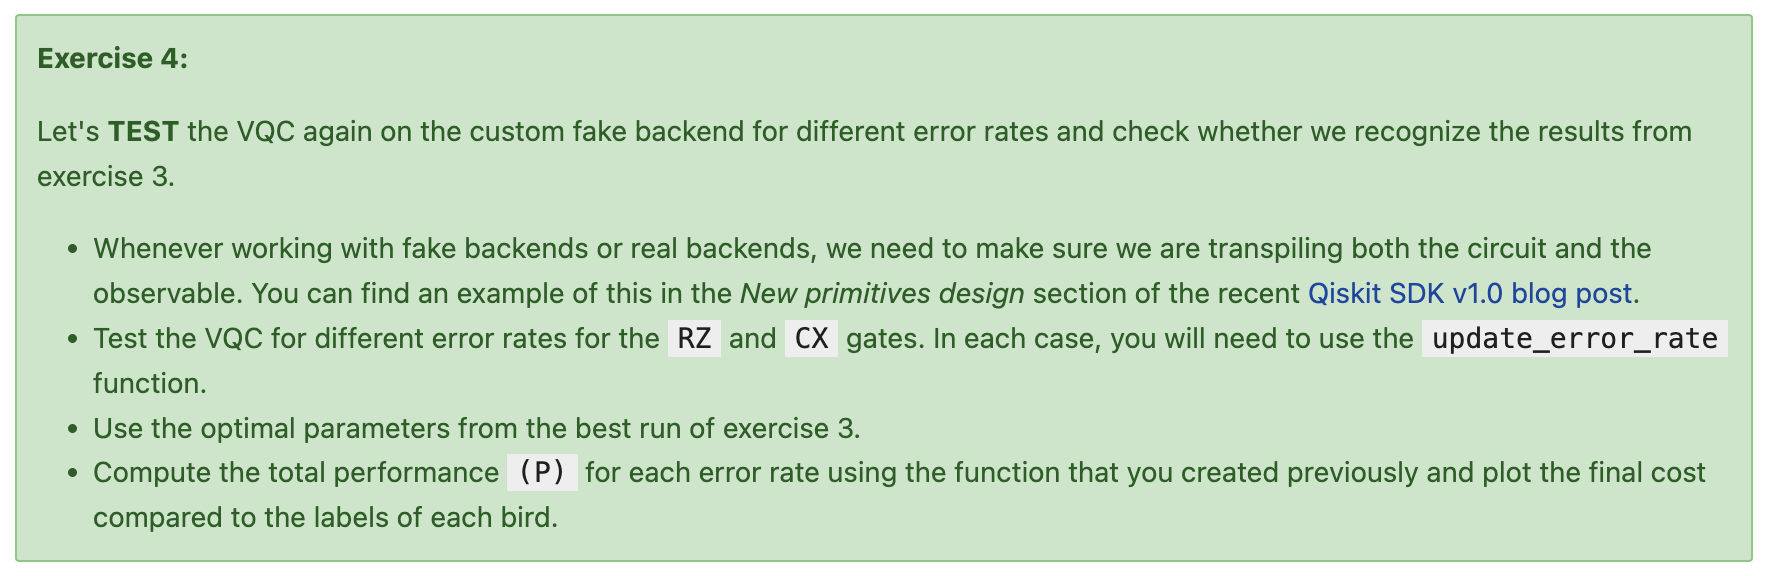

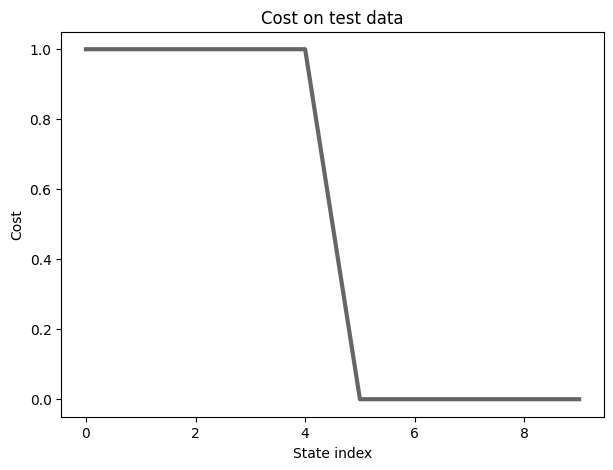

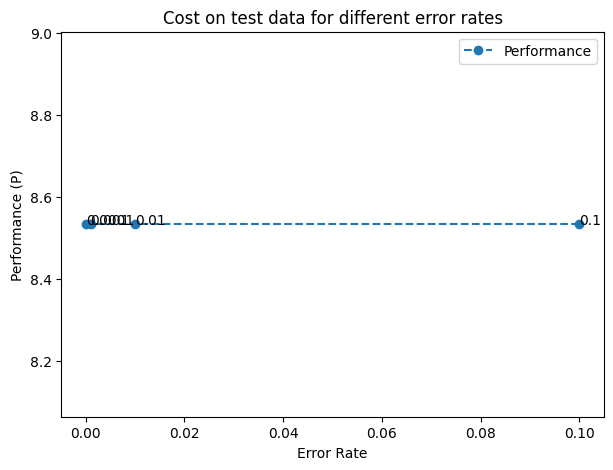

In [159]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')
ax.plot(list_labels, 'k-', linewidth=3, alpha=0.6, label='Labels')

# Assuming you have the necessary imports and definitions from the previous exercises

# Define the error rate values to test
error_rates = [1e-1, 1e-2, 1e-3, 1e-4]

# Define the optimal parameters obtained from Exercise 3
opt_params = res_list[best_result_index].x

# Initialize lists to store performances and results
performances = []
results_lists = []

# Loop over error rates
for error_rate in error_rates:
    # Update the error rates of the fake backend
    update_error_rate(fake_backend, {
        "default_duration": 1e-8,
        "rz_error": error_rate,
        "cx_error": error_rate
    })

    # Initialize a pass manager
    pm = generate_preset_pass_manager(backend=AerSimulator(), optimization_level=3, seed_transpiler=0)

    # Test the VQC with the updated error rates
    results_test = test_VQC(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm)

    # Compute the performance
    performance = compute_performance(results_test, list_labels)

    # Store the performance and results
    performances.append(performance)
    results_lists.append(results_test)

# Plot the final cost compared to the labels of each bird
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data for different error rates')
ax.set_ylabel('Performance (P)')
ax.set_xlabel('Error Rate')
ax.plot(error_rates, performances, 'o--', label='Performance')

# Add labels
for i, txt in enumerate(error_rates):
    ax.annotate(f'{txt}', (error_rates[i], performances[i]))

ax.legend()
plt.show()


In [160]:
# Submit your answer using following code
grade_lab4_ex4(fake_backend) # Expected answer type: BackendV2

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


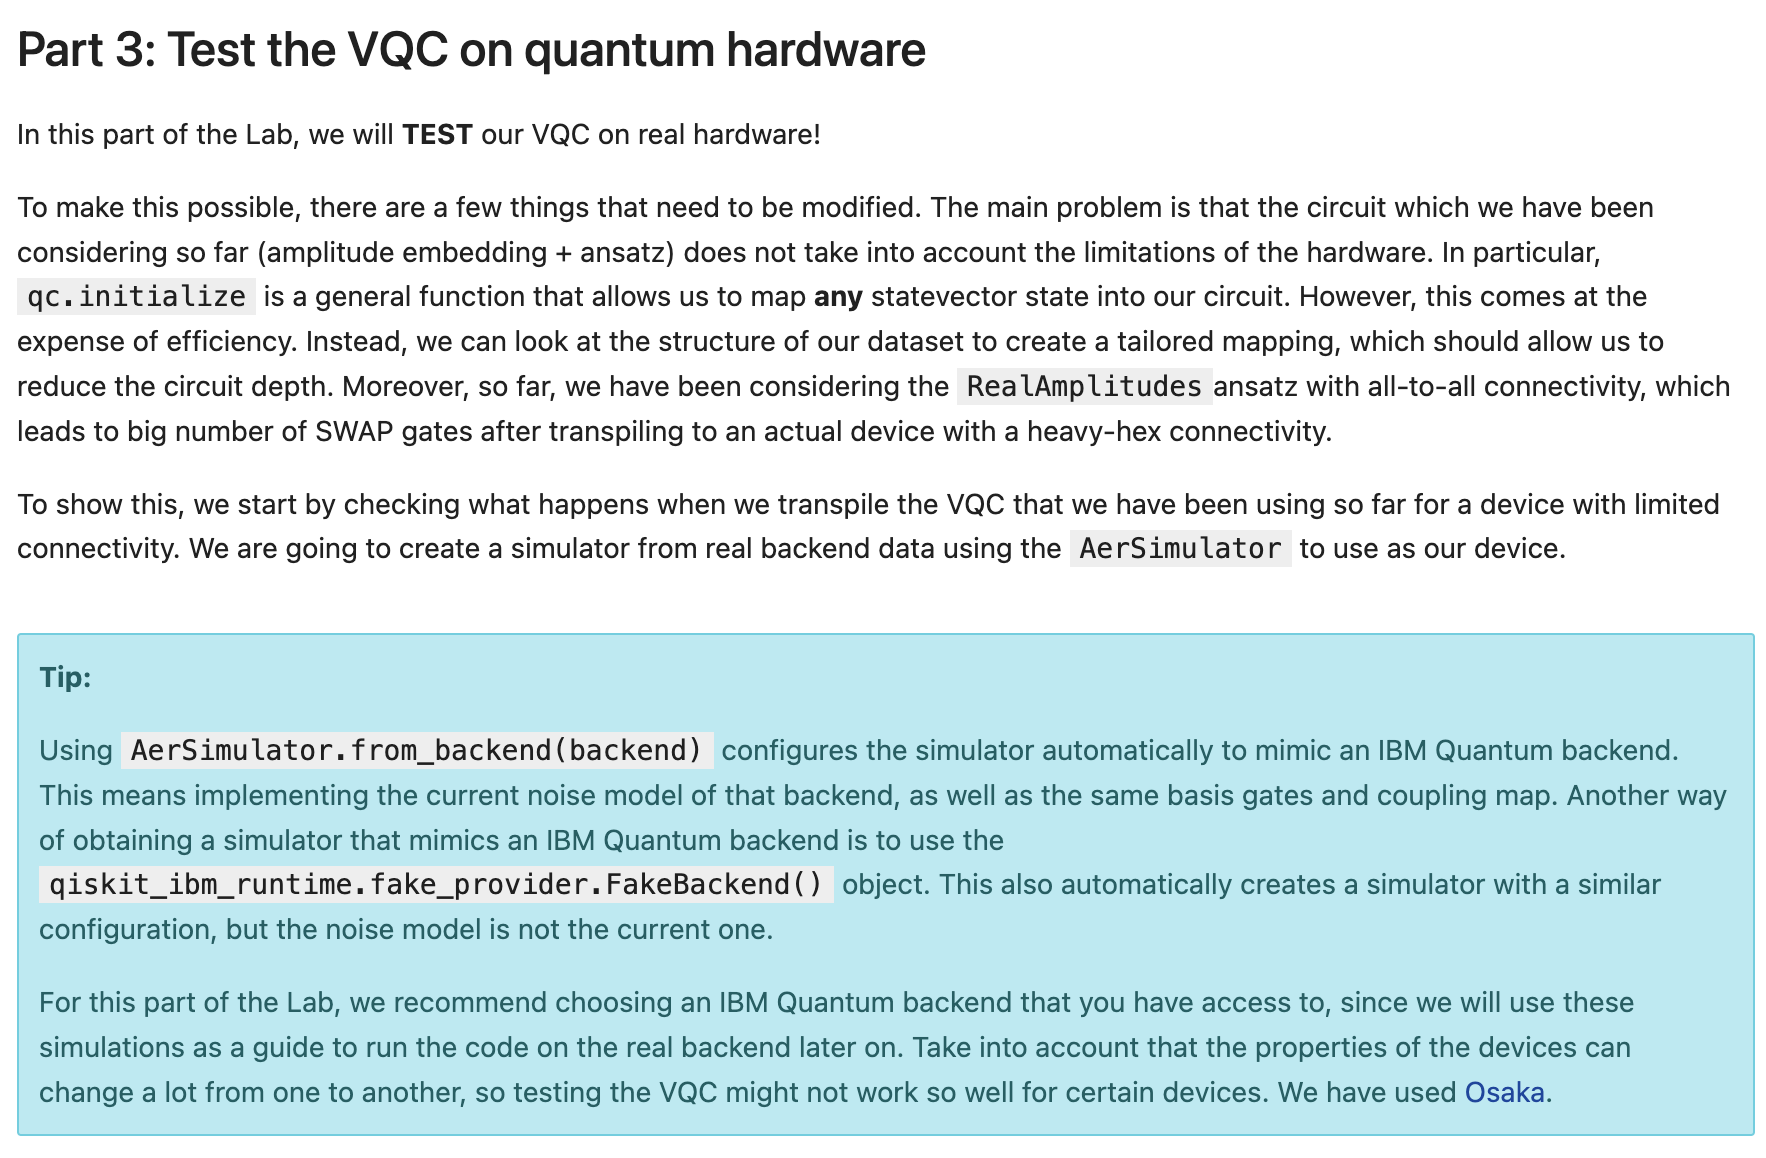

In [22]:
# Choose a real backend
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b",
    set_as_default=True,
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()
backend = service.backend("ibm_osaka")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

Let's start by checking the two-qubit depth of circuit we get by using qc.initialize after transpilation

Depth of two-qubit gates:  39


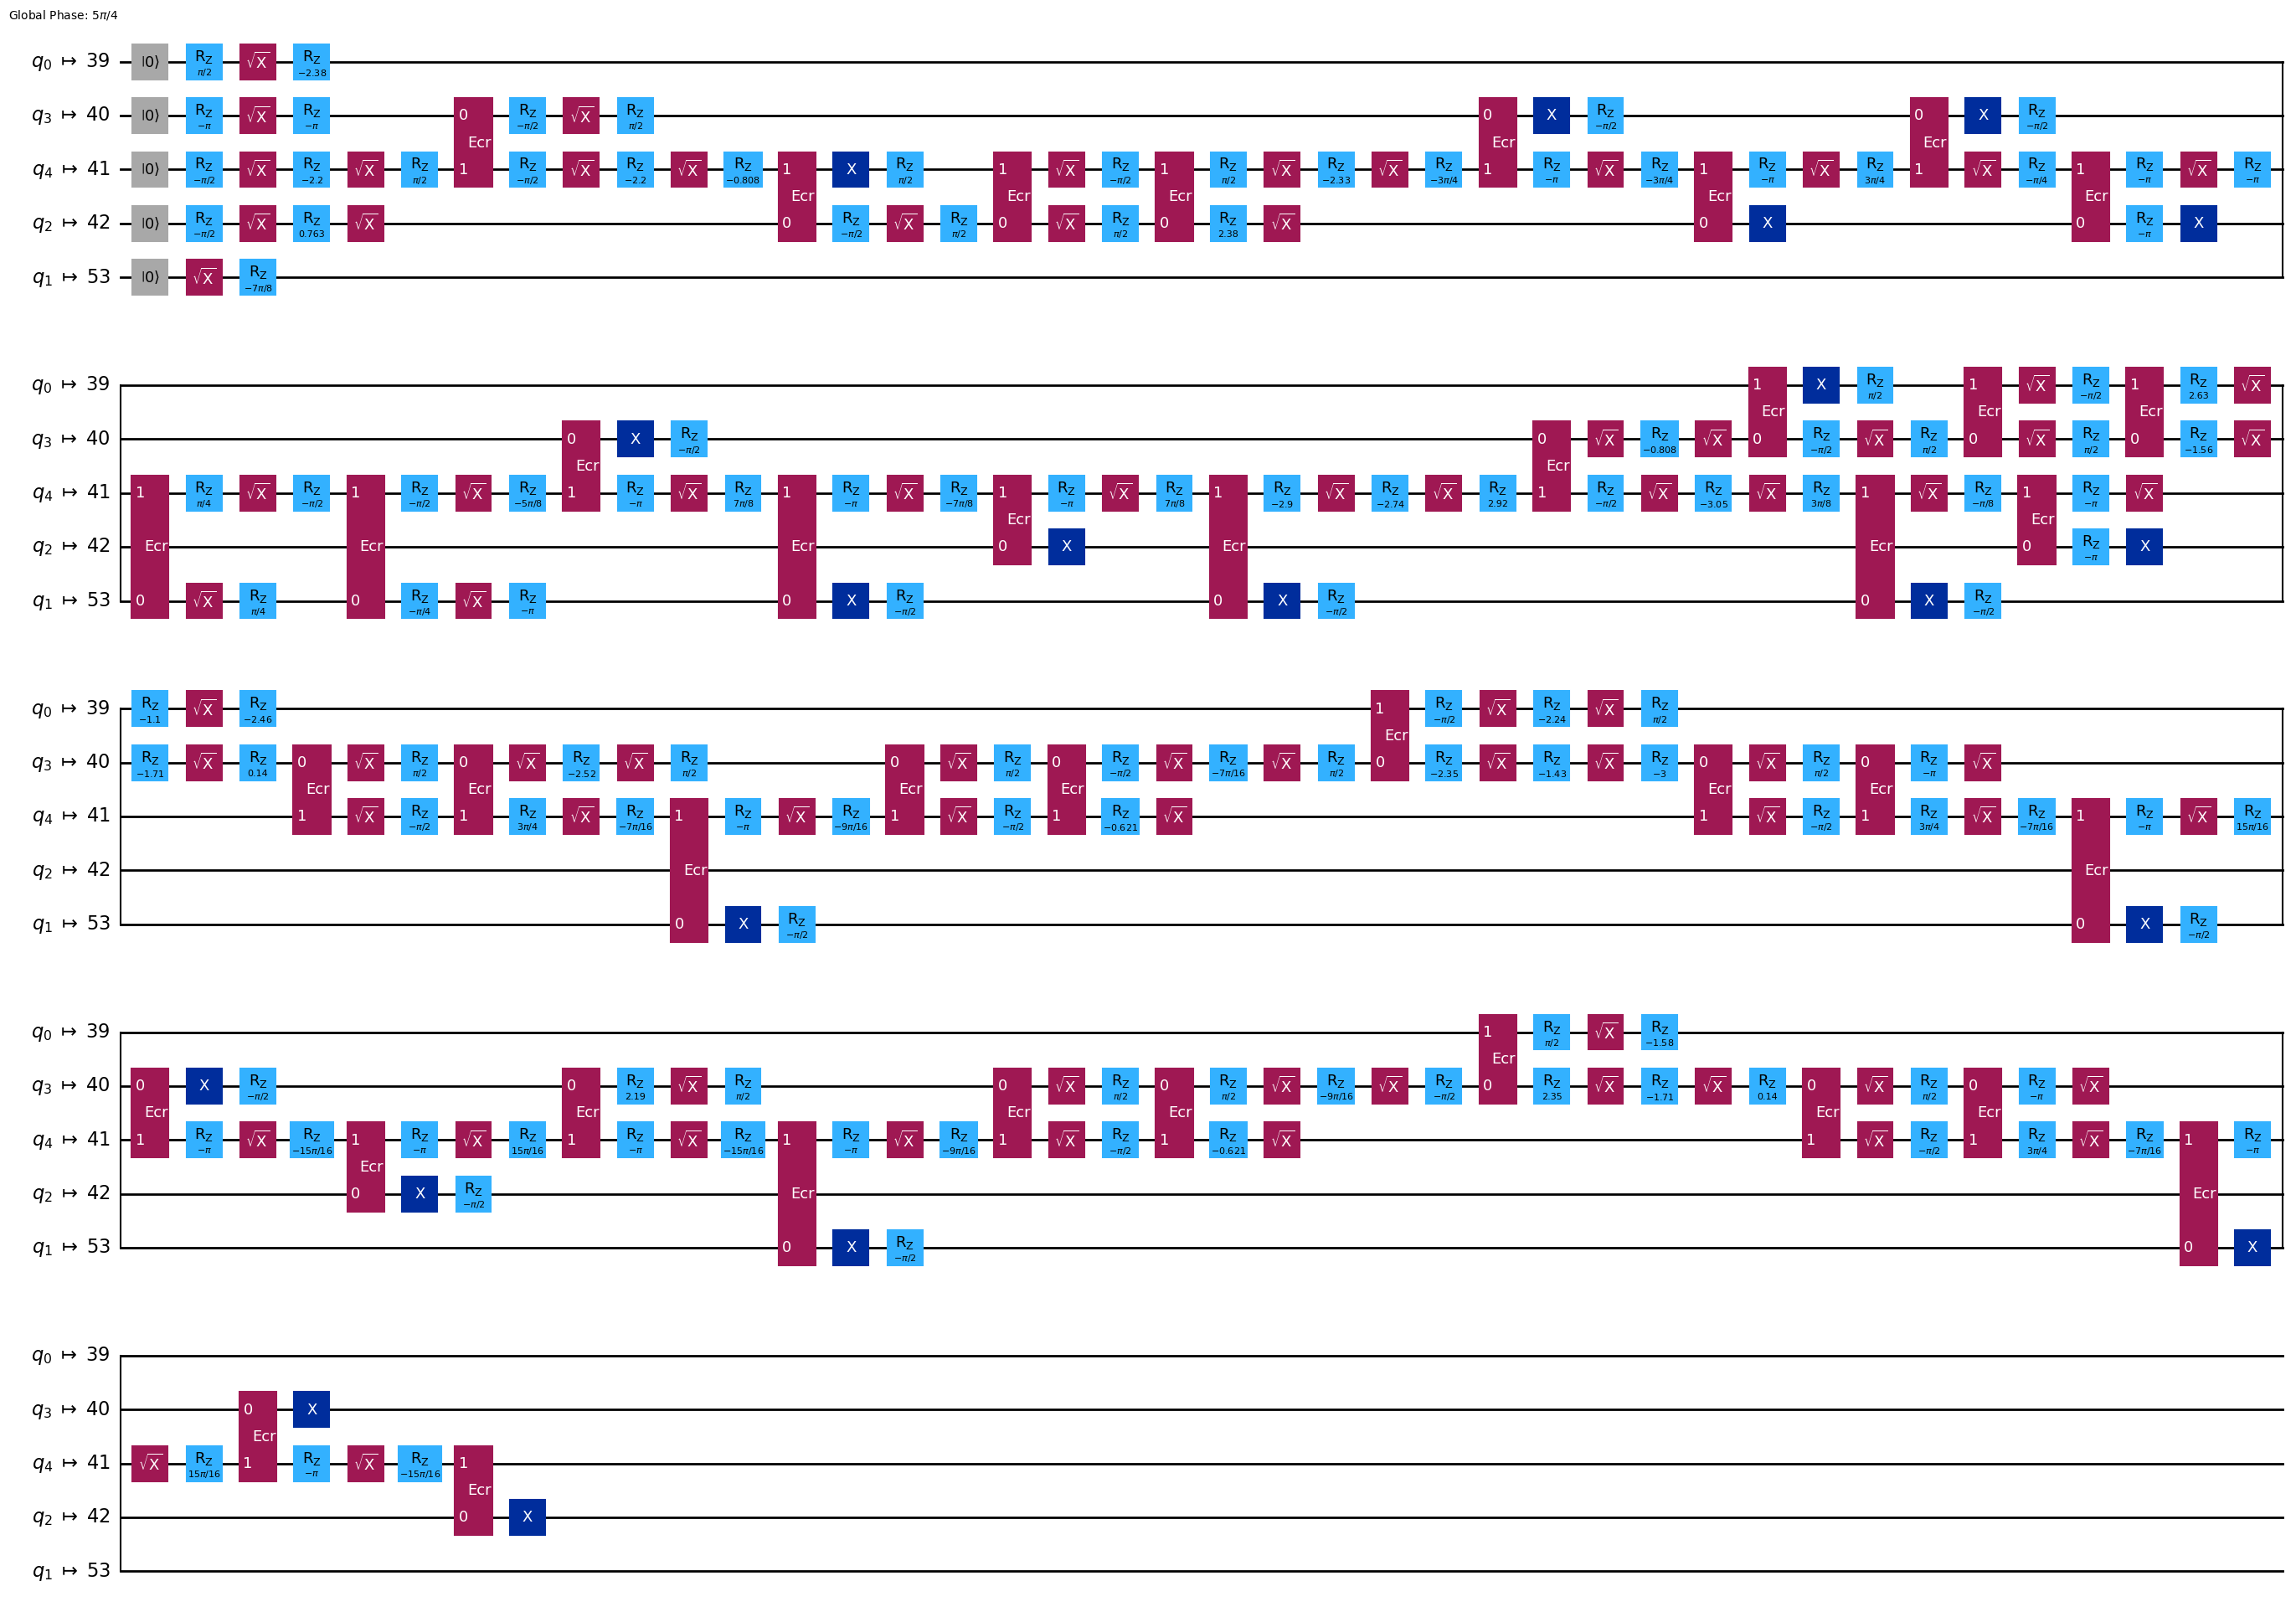

In [23]:
index_bird = 0 #you can check different birds by changing the index
qc = QuantumCircuit(num_qubits)
qc.initialize(list_coefficients[index_bird])
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", idle_wires=False, fold=40)

This circuit is too deep to be run on real quantum hardware! Let's try to find a different way to map the states of the dataset.

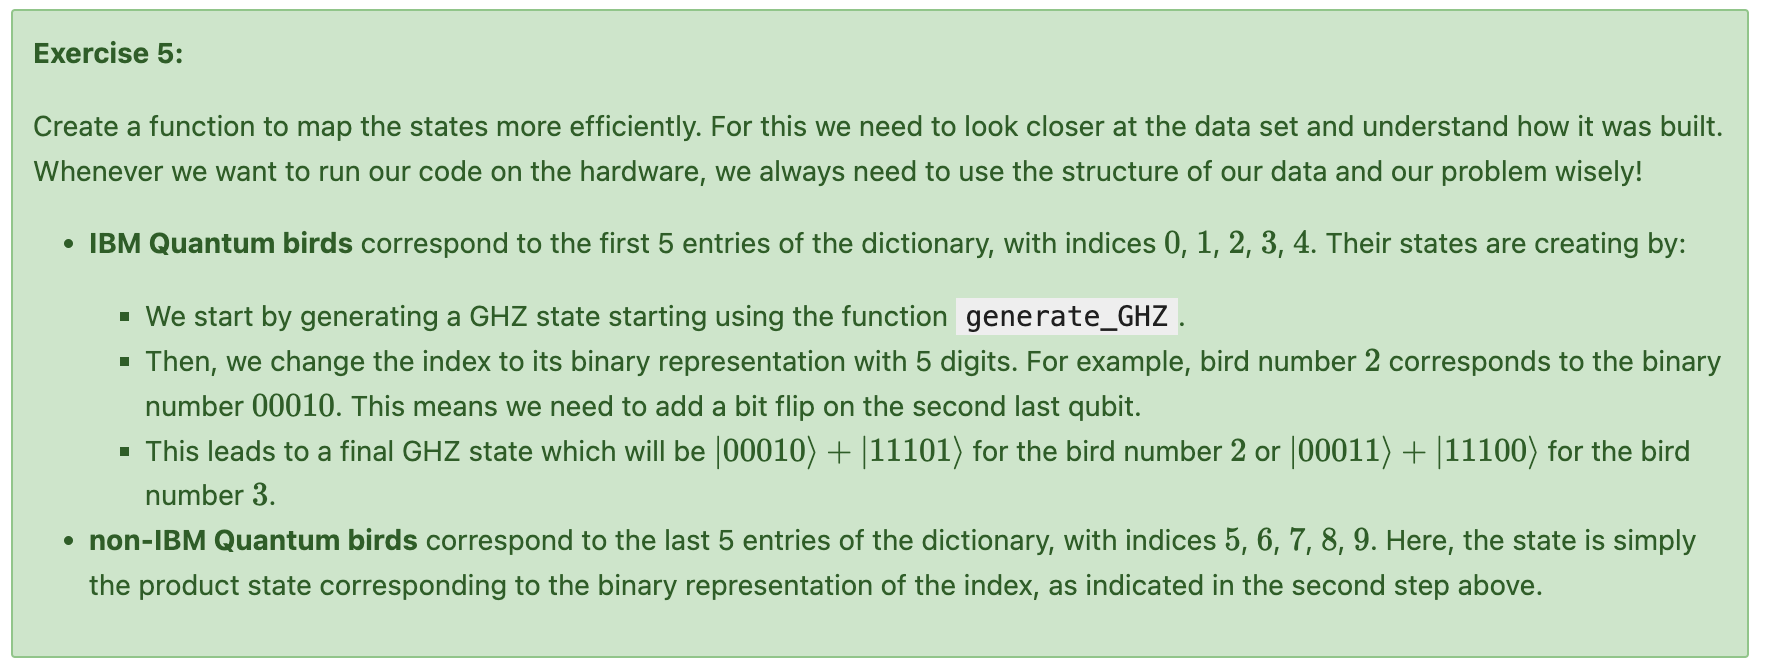
Warning: If you create any helper functions, make sure to place them inside of the amplitude_embedding function.

          
q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
q_4: ─────
          


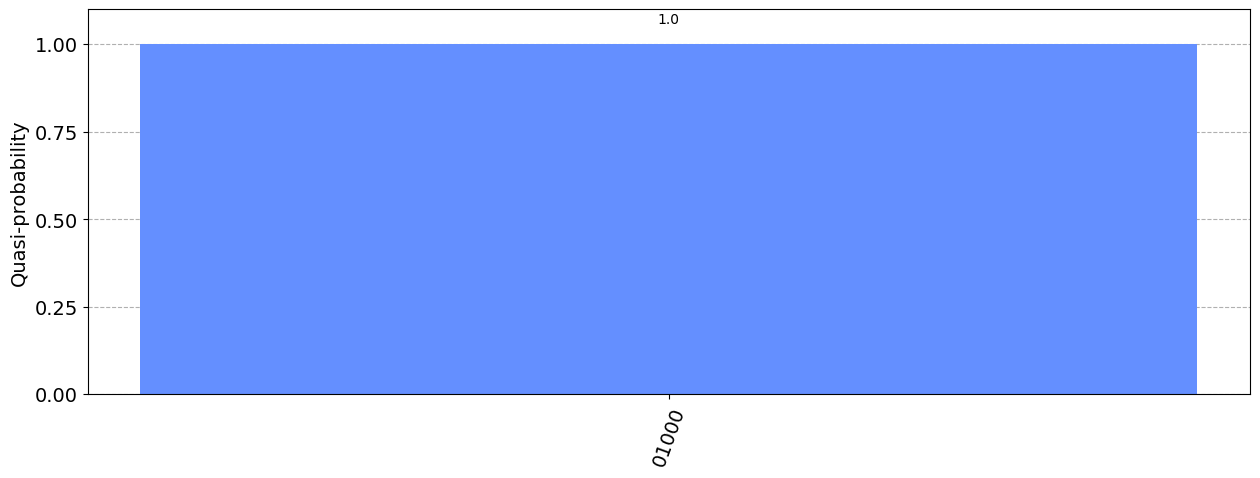

In [140]:
def amplitude_embedding(num_qubits, bird_index):
    """
    Create amplitude embedding circuit

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        bird_index (int): Data index of the bird

    Returns:
        qc (QuantumCircuit): Quantum circuit with amplitude embedding of the bird
    """
    qc = QuantumCircuit(num_qubits)

    # Generate GHZ state
    def generate_GHZ(qc):
        qc.h(0)
        for i, j in zip(range(num_qubits-1), range(1, num_qubits)):
            qc.cx(i, j)

    # Write your code below here
    binary_index = format(bird_index, '05b')
    if bird_index <= 5:
        generate_GHZ(qc)
        for i, bit in enumerate(binary_index):
            if bit == '1':
                qc.x(i)
    else:
        for i in range(num_qubits):
            if bird_index & (1 << i):
                qc.x(i)

    ### Don't change any code past this line ###
    return qc

# Example usage
num_qubits = 5
bird_index = 8
bird_circuit = amplitude_embedding(num_qubits, bird_index)

print(bird_circuit)
bird_circuit.measure_all()

# Define the backend and the pass manager
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit1 = pm.run(bird_circuit)

# Define the sampler with the number of shots
sampler = Sampler(backend=aer_sim)
result = sampler.run([isa_circuit1]).result()
samp_dist = result[0].data.meas.get_counts()
plot_distribution(samp_dist, figsize=(15, 5))


5
3
11000
     ┌───┐     ┌───┐          
q_0: ┤ H ├──■──┤ X ├──────────
     └───┘┌─┴─┐└───┘┌───┐     
q_1: ─────┤ X ├──■──┤ X ├─────
          └───┘┌─┴─┐└───┘     
q_2: ──────────┤ X ├──■───────
               └───┘┌─┴─┐     
q_3: ───────────────┤ X ├──■──
                    └───┘┌─┴─┐
q_4: ────────────────────┤ X ├
                         └───┘
     ┌───┐     ┌───┐          
q_0: ┤ H ├──■──┤ X ├──────────
     └───┘┌─┴─┐└───┘┌───┐     
q_1: ─────┤ X ├──■──┤ X ├─────
          └───┘┌─┴─┐└───┘     
q_2: ──────────┤ X ├──■───────
               └───┘┌─┴─┐     
q_3: ───────────────┤ X ├──■──
                    └───┘┌─┴─┐
q_4: ────────────────────┤ X ├
                         └───┘


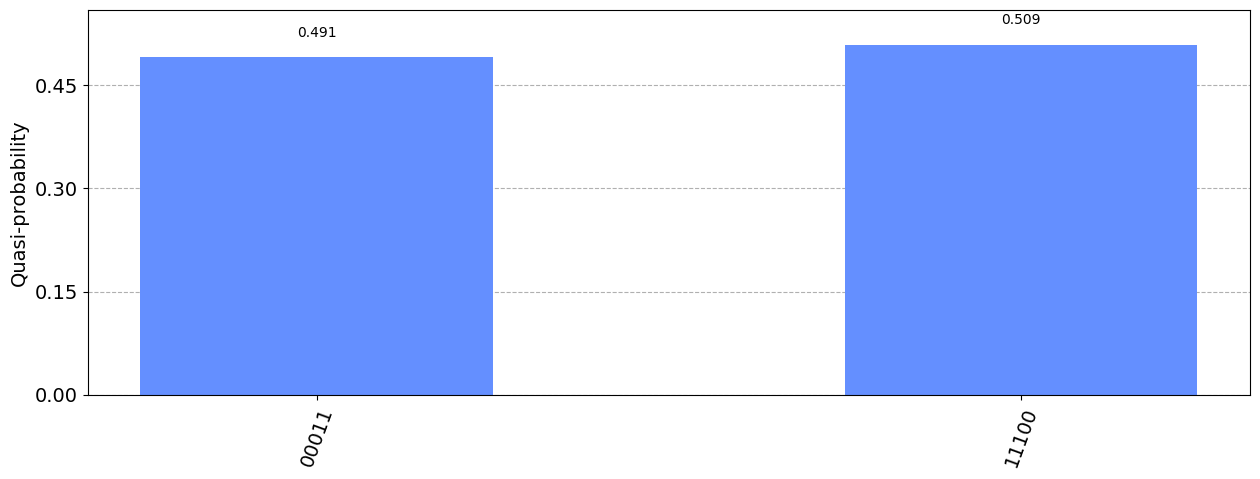

In [167]:
from qiskit import QuantumCircuit

def amplitude_embedding(num_qubits, bird_index):
    """
    Create amplitude embedding circuit

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        bird_index (int): Data index of the bird

    Returns:
        qc (QuantumCircuit): Quantum circuit with amplitude embedding of the bird
    """
    qc = QuantumCircuit(num_qubits)
    print(num_qubits)
    print(bird_index)
    # Generate GHZ state
    def generate_GHZ(qc):
        qc.h(0)
        for i in range(num_qubits - 1):
            qc.cx(i, i + 1)

    # Generate GHZ state for IBM Quantum birds (indices 0 to 4)
    # Write your code below here
    binary_index = format(bird_index, '05b')[::-1]
    print(binary_index)
    if bird_index < 5:
        generate_GHZ(qc)
        for i, bit in enumerate(binary_index):
            if bit == '1':
                qc.x(i)
    # For non-IBM Quantum birds, simply create a product state
    else:
        for i in range(num_qubits):
            if bird_index & (1 << i):
                qc.x(i)
    print(qc)
    # qc.measure_all()

    # # # Define the backend and the pass manager
    # aer_sim = AerSimulator()
    # pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
    # isa_circuit1 = pm.run(qc)

    # # # Define the sampler with the number of shots
    # sampler = Sampler(backend=aer_sim)
    # result = sampler.run([isa_circuit1]).result()
    # samp_dist = result[0].data.meas.get_counts()
    # print(samp_dist)
    # plot_distribution(samp_dist, figsize=(15, 5))
    return qc
# Example usage
num_qubits = 5
bird_index = 3
bird_circuit = amplitude_embedding(num_qubits, bird_index)
print(bird_circuit)
bird_circuit.measure_all()

# Define the backend and the pass manager
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit1 = pm.run(bird_circuit)

# Define the sampler with the number of shots
sampler = Sampler(backend=aer_sim)
result = sampler.run([isa_circuit1]).result()
samp_dist = result[0].data.meas.get_counts()

plot_distribution(samp_dist, figsize=(15, 5))

In [168]:
# Submit your answer using following code
grade_lab4_ex5(amplitude_embedding) # Expected answer type Callable

5
0
00000
     ┌───┐                    
q_0: ┤ H ├──■─────────────────
     └───┘┌─┴─┐               
q_1: ─────┤ X ├──■────────────
          └───┘┌─┴─┐          
q_2: ──────────┤ X ├──■───────
               └───┘┌─┴─┐     
q_3: ───────────────┤ X ├──■──
                    └───┘┌─┴─┐
q_4: ────────────────────┤ X ├
                         └───┘
5
1
10000
     ┌───┐     ┌───┐          
q_0: ┤ H ├──■──┤ X ├──────────
     └───┘┌─┴─┐└───┘          
q_1: ─────┤ X ├──■────────────
          └───┘┌─┴─┐          
q_2: ──────────┤ X ├──■───────
               └───┘┌─┴─┐     
q_3: ───────────────┤ X ├──■──
                    └───┘┌─┴─┐
q_4: ────────────────────┤ X ├
                         └───┘
5
2
01000
     ┌───┐                    
q_0: ┤ H ├──■─────────────────
     └───┘┌─┴─┐     ┌───┐     
q_1: ─────┤ X ├──■──┤ X ├─────
          └───┘┌─┴─┐└───┘     
q_2: ──────────┤ X ├──■───────
               └───┘┌─┴─┐     
q_3: ───────────────┤ X ├──■──
                    └───┘┌─┴─┐
q_4: ────

The cell below can be used to check if you are creating the correct states:

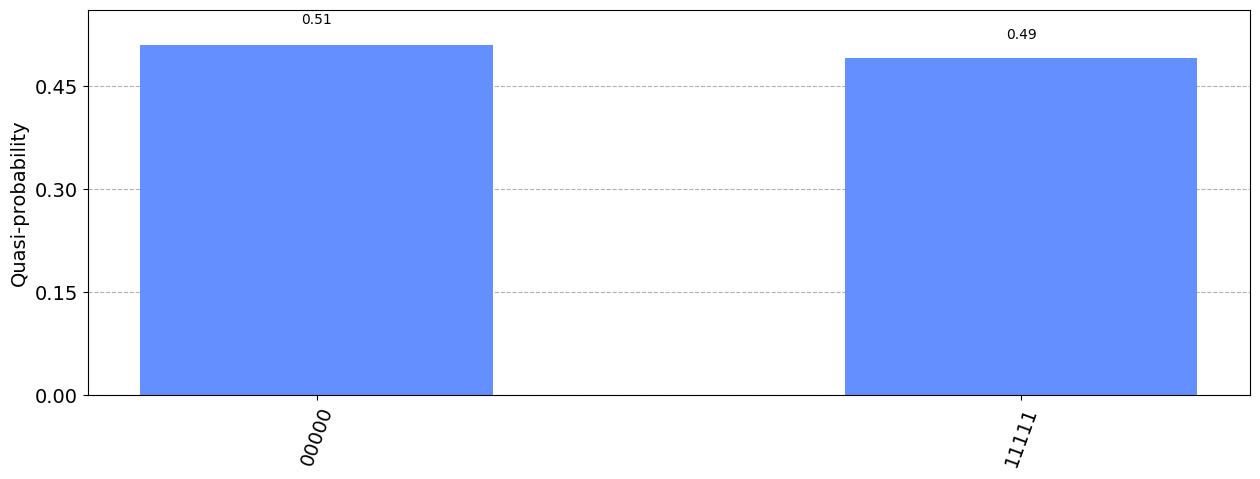

In [165]:
index_bird = 0 # You can check different birds by changing the index

# Build the amplitude embedding
qc = amplitude_embedding(num_qubits, index_bird)
qc.measure_all()

# Define the backend and the pass manager
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuit = pm.run(qc)

# Define the sampler with the number of shots
sampler = Sampler(backend=aer_sim)
result = sampler.run([isa_circuit]).result()
samp_dist = result[0].data.meas.get_counts()
plot_distribution(samp_dist, figsize=(15, 5))

Depth of two-qubit gates:  4


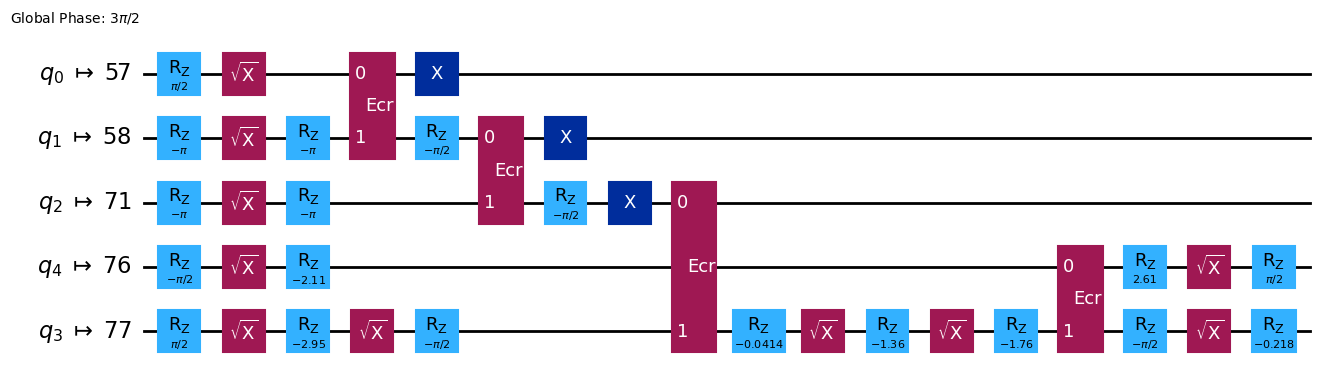

In [166]:
# Now, let's check the depth of the new amplitude embedding circuit:

index_bird = 0 #You can check different birds by changing the index
qc = amplitude_embedding(num_qubits, index_bird)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

Depth of two-qubit gates:  18


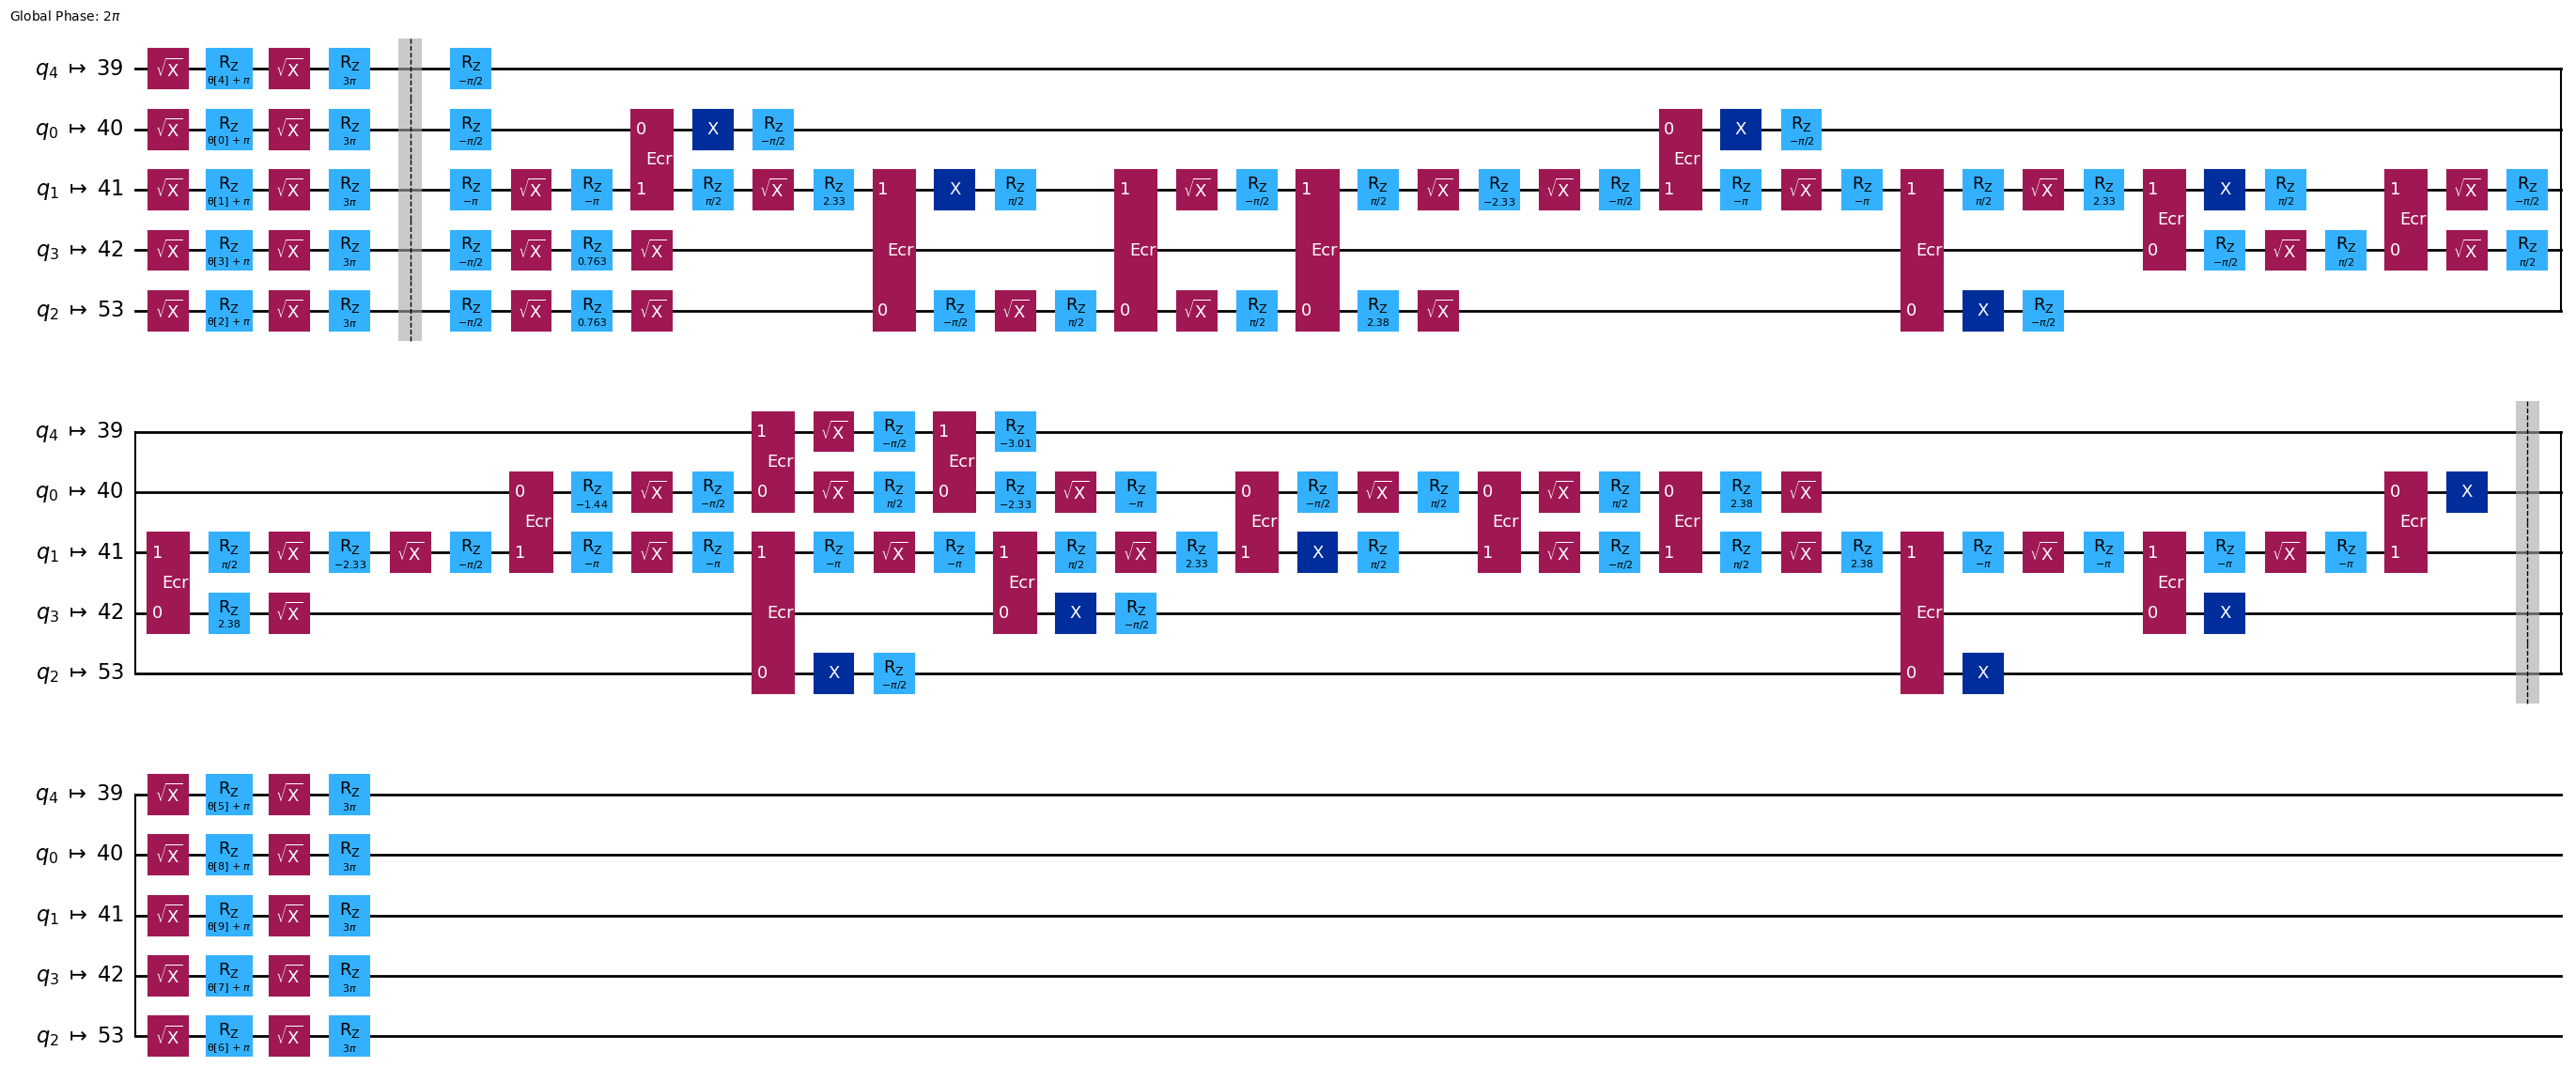

In [172]:
# Now, let's check the transpiled version of the RealAmplitudes ansatz using full connectivity.

old_ansatz = RealAmplitudes(num_qubits, reps=1, entanglement='full', insert_barriers=True)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_ansatz = pm.run(old_ansatz)

print('Depth of two-qubit gates: ', transpiled_ansatz.depth(lambda x: len(x.qubits) == 2))
transpiled_ansatz.draw(output="mpl", idle_wires=False, fold=40)

Depth of two-qubit gates:  4


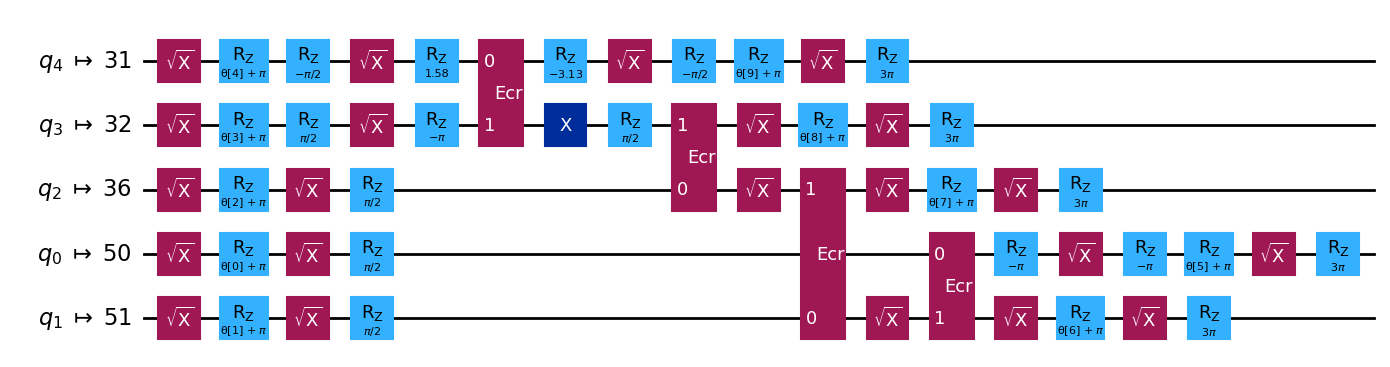

In [175]:
ansatz =RealAmplitudes(num_qubits=num_qubits, reps=reps)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_ansatz =pm.run(ansatz)

print('Depth of two-qubit gates: ', transpiled_ansatz.depth(lambda x: len(x.qubits) == 2))
transpiled_ansatz.draw(output="mpl", fold=False, idle_wires=False)

In [291]:
# Now, we can compare the total two-qubit gate depth of the old and the new VQC circuit by transpiling the composition of the amplitude embedding and the ansatz.

old_mapping = QuantumCircuit(num_qubits)
old_mapping.initialize(list_coefficients[index_bird])
old_classifier = old_mapping.compose(old_ansatz)

new_mapping = amplitude_embedding(num_qubits, index_bird)
new_classifier = new_mapping.compose(ansatz)

pm = generate_preset_pass_manager(optimization_level=3, backend=AerSimulator())
old_transpiled_classifier = pm.run(old_classifier)
new_transpiled_classifier = pm.run(new_classifier)

print('Old depth of two-qubit gates: ', old_transpiled_classifier.depth(lambda x: len(x.qubits) == 2))
print('Current depth of two-qubit gates: ', new_transpiled_classifier.depth(lambda x: len(x.qubits) == 2))
# With the new ansatz we have reduced the depth by a factor of 10! This means that we are ready to test our VQC on quantum ha

0
Old depth of two-qubit gates:  7
Current depth of two-qubit gates:  8


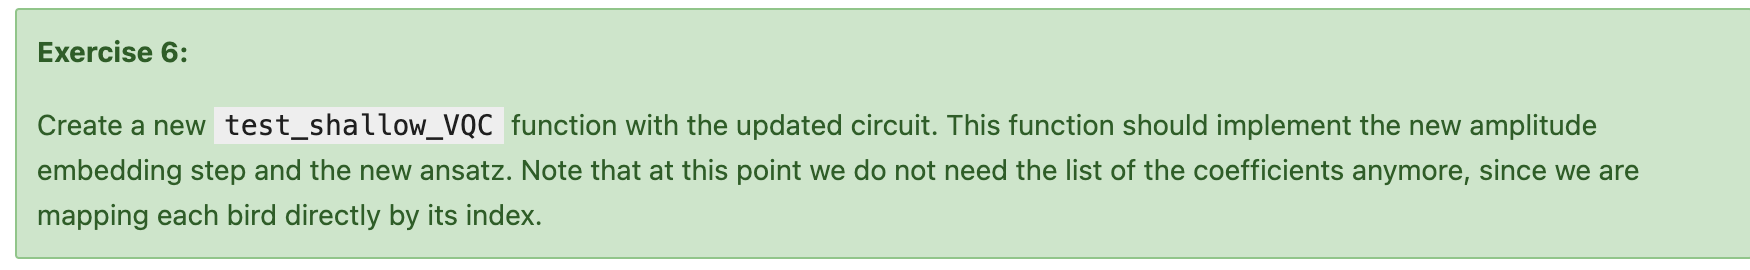

In [24]:
def test_shallow_VQC(list_labels, ansatz, obs, opt_params, estimator, pm):
    """Return the performance of the classifier

    Parameters:
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        estimator (EstimatorV2): Statevector estimator
        pm (PassManager): Pass manager for transpilation

    Returns:
        results_test (list): List of test results
    """
    results_test = []

    for bird_index in range(len(list_labels)):
        # Create amplitude embedding circuit
        qc = amplitude_embedding(ansatz.num_qubits, bird_index)

        # Compose amplitude embedding circuit with ansatz
        classifier = qc.compose(ansatz)

        # Transpile classifier
        transpiled_classifier = pm.run(classifier)

        # Transpile observable
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)

        # Run estimator
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        job = estimator.run([pub])

        # Get result
        result = job.result()[0].data.evs

        # Append the result
        results_test.append(result)

    return results_test


In [25]:
# Let's test the shallow VQC on the fake backend! We have already trained the new VQC for you, so you can use the optimal parameters given in opt_params_shallow_VQC.npy.

estimator = Estimator(backend=fake_backend)
estimator.options.default_shots = 20000
pm = generate_preset_pass_manager(optimization_level=0, backend=fake_backend)

opt_params = np.load('opt_params_shallow_VQC.npy') # Load optimal parameters
results_test = test_shallow_VQC(list_labels, ansatz, obs, opt_params, estimator, pm)

print(f"Performance: {compute_performance(results_test, list_labels)}")

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')
ax.plot(list_labels, 'k-', linewidth=3, alpha=0.6, label='Labels')
ax.plot(results_test, 'o--', label='Fake Backend')
ax.legend()

NameError: name 'amplitude_embedding' is not defined

In [289]:
results_test1 = [float(result) for result in results_test]
# results_test1[6] =-0.000093046875
results_test1

[-0.0009765625,
 -0.0048828125,
 0.01123046875,
 0.00439453125,
 0.0185546875,
 -0.0126953125,
 -9.3046875e-05,
 -0.00830078125,
 -0.00048828125,
 -0.02001953125]

In [295]:

# Submit your answer using following code
grade_lab4_ex6(list_labels
) # Expected answer type: list[float]

Submitting your answer. Please wait...
Performance: 100.00% > 70%
Congratulations! 🎉 Your answer is correct.


In [296]:
service = QiskitRuntimeService()
backend = service.backend("ibm_osaka")

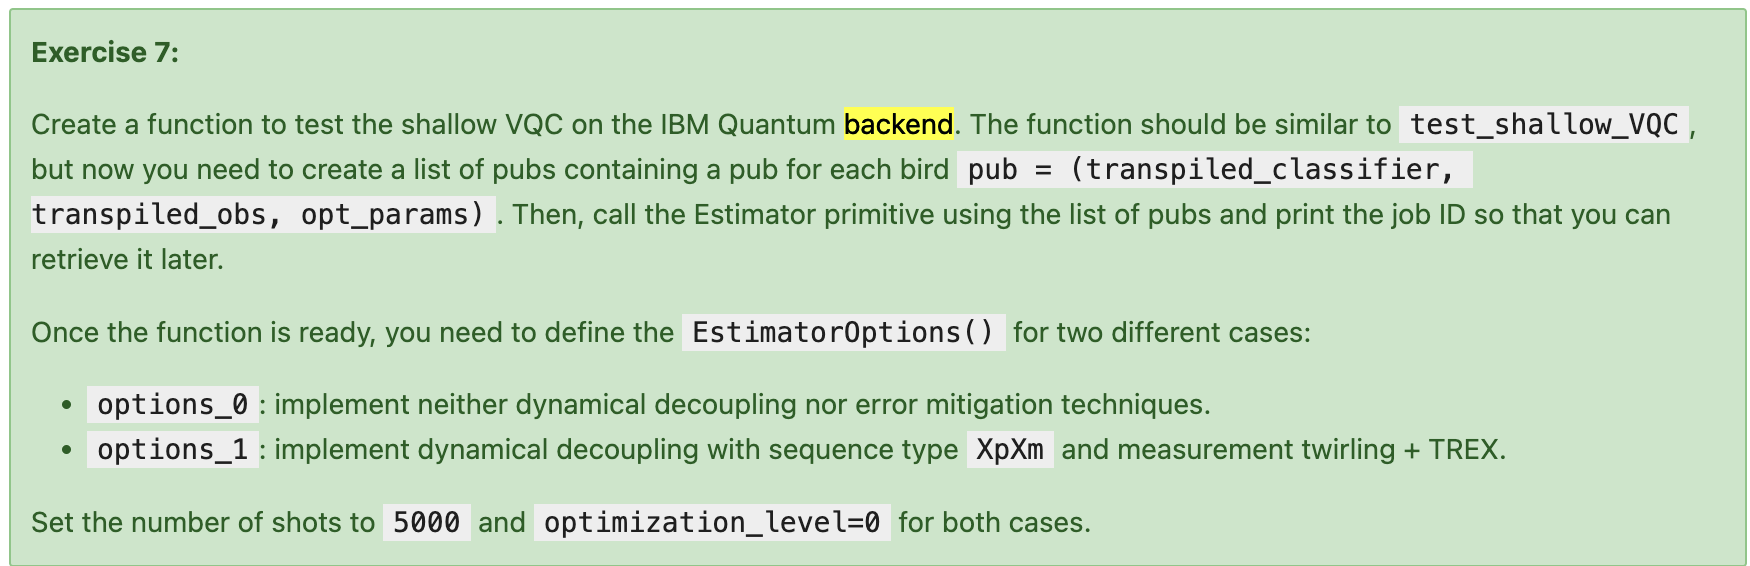

In [58]:
def test_shallow_VQC_QPU(list_labels, ansatz, obs, opt_params, options, backend):
    """
    Return the performance of the classifier

    Parameters:
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        options (EstimatorOptions): Estimator options
        backend (service.backend): Backend to run the job

    Returns:
        job_id (str): Job ID
    """

    estimator = Estimator(backend=backend, options=options)
    pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

    pubs = []
    for bird, label in enumerate(list_labels):
        # Create amplitude embedding circuit
        qc = amplitude_embedding(ansatz.num_qubits, bird)
        # Compose amplitude embedding circuit with ansatz
        classifier = qc.compose(ansatz)
        # Transpile classifier
        transpiled_classifier = pm.run(classifier)
        # Transpile observable
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        # Append to pubs
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        pubs.append(pub)

    job = estimator.run(pubs)
    job_id = job.job_id()
    print(f"Job ID: {job_id}")
    print(f"Status: {job.status()}")

    return job_id


In [137]:
from qiskit_ibm_runtime.options import EstimatorOptions, DynamicalDecouplingOptions, TwirlingOptions
options_0 = EstimatorOptions(
    default_shots=5000,
    optimization_level=0,
    dynamical_decoupling=DynamicalDecouplingOptions(
        enable=False,
        sequence_type='XpXm'
    ),
    # dynamical_decoupling=DynamicalDecouplingOptions(sequence="XpXm"),
    twirling=TwirlingOptions(
        enable_measure=False
    ),
     resilience_level=0
)


# Implement dynamical decoupling with sequence type XpXm and measurement twirling + TREX
options_1 = EstimatorOptions(
    default_shots=5000,
    optimization_level=0,
    dynamical_decoupling=DynamicalDecouplingOptions(
        enable=True,
        sequence_type='XpXm'
    ),
    # dynamical_decoupling=DynamicalDecouplingOptions(sequence="XpXm"),
    twirling=TwirlingOptions(
        enable_measure=True
    ),
     resilience_level=1
)


In [138]:
# Verify the types of options_0 and options_1
print(type(options_0))
print(type(options_1))


<class 'qiskit_ibm_runtime.options.estimator_options.EstimatorOptions'>
<class 'qiskit_ibm_runtime.options.estimator_options.EstimatorOptions'>


In [139]:
# Submit your answer using following code
grade_lab4_ex7(options_0, options_1) # Expected answer type: EstimatorOptions, EstimatorOptions

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.
